In [55]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [56]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [166]:
%%R 

library(tidycensus)
library(tidyverse)

options(tigris_use_cache = TRUE)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [287]:
import requests
import time

# Base URL and parameters
base_url = "https://data.cityofnewyork.us/resource/erm2-nwe9.json"
complaint_types = ["Dead Tree", "Dead/Dying Tree"]
limit = 1000
offset = 0

all_records = []

# Loop over the combined complaint types
while True:
    complaint_filter = f"complaint_type IN ('{complaint_types[0]}', '{complaint_types[1]}')"

    params = {
        "$where": complaint_filter,
        "$order": "created_date DESC",
        "$limit": limit,
        "$offset": offset
    }

    response = requests.get(base_url, params=params)

    if response.status_code != 200:
        print(f"Failed request at offset {offset}. Status code: {response.status_code}")
        break

    data = response.json()
    if not data:
        print("No more records to fetch.")
        break

    all_records.extend(data)
    print(f"Fetched {len(data)} records; total so far: {len(all_records)}")

    offset += limit
    time.sleep(1)  # Be polite to the API

# Convert to DataFrame
df_dead_trees = pd.DataFrame(all_records)

# Show basic info
print(f"\nTotal records fetched: {len(df_dead_trees)}")

Fetched 1000 records; total so far: 1000
Fetched 1000 records; total so far: 2000
Fetched 1000 records; total so far: 3000
Fetched 1000 records; total so far: 4000
Fetched 1000 records; total so far: 5000
Fetched 1000 records; total so far: 6000
Fetched 1000 records; total so far: 7000
Fetched 1000 records; total so far: 8000
Fetched 1000 records; total so far: 9000
Fetched 1000 records; total so far: 10000
Fetched 1000 records; total so far: 11000
Fetched 1000 records; total so far: 12000
Fetched 1000 records; total so far: 13000
Fetched 1000 records; total so far: 14000
Fetched 1000 records; total so far: 15000
Fetched 1000 records; total so far: 16000
Fetched 1000 records; total so far: 17000
Fetched 1000 records; total so far: 18000
Fetched 1000 records; total so far: 19000
Fetched 1000 records; total so far: 20000
Fetched 1000 records; total so far: 21000
Fetched 1000 records; total so far: 22000
Fetched 1000 records; total so far: 23000
Fetched 1000 records; total so far: 24000
F

## Analyzing tree points data

In [1]:
import pandas as pd

In [2]:
trees = pd.read_csv('Forestry_Tree_Points_20250623.csv')

In [3]:
trees.head()

OBJECTID   DBH TPStructure TPCondition  StumpDiameter  \
0    268502   8.0        Full        Good            NaN   
1    572776   0.0     Retired     Unknown           10.0   
2    520310  10.0        Full        Good            NaN   
3    582401   0.0       Stump     Unknown            7.0   
4    746627  18.0        Full        Good            NaN   

                  PlantingSpaceGlobalID  \
0  CDEA211F-C515-4D85-B53A-24A369ABF44A   
1  9AB72953-640F-4A04-AB00-2814F9412FE7   
2  A72C5B1A-94FE-454E-9816-A65392DEC753   
3  D7A58F5E-2BE3-4222-A465-1289D002E270   
4  CCD7CEB4-D7FC-427F-982C-55355AB0989D   

                                       Geometry  \
0   POINT(-74.13366894015142 40.56652626802944)   
1     POINT(-73.9293946965878 40.8515468717439)   
2  POINT(-73.81975834423963 40.790435481385714)   
3  POINT(-73.91575377982007 40.869686117352636)   
4   POINT(-73.93851920790104 40.60738960999758)   

                               GlobalID       GenusSpecies  \
0  C72DADDC-2745-4B42-9969-8766ADA2B56C       Acer - maple   
1  1C439622-3941-43C1-978B-07B5FD90FF0F  Unknown - Unknown   
2  B9B6CBC6-D108-4955-A5E1-29AA03556411       Acer - maple   
3  4B92A177-7F20-464C-8BE3-E8562D4FF901  Unknown - Unknown   
4  FF71F967-C0E7-478E-BD3A-C54A2927A624       Acer - maple   

                   CreatedDate UpdatedDate PlantedDate  RiskRating  \
0  2015-07-22 11:44:00.0000000         NaN         NaN         NaN   
1  2015-08-25 10:30:28.0000000         NaN         NaN         NaN   
2  2015-08-21 18:09:00.0000000         NaN         NaN         NaN   
3  2015-08-25 10:56:26.0000000         NaN         NaN         NaN   
4  2015-09-04 14:54:00.0000000         NaN         NaN         NaN   

  RiskRatingDate                                       Location  
0            NaN   POINT (-74.13366894015142 40.56652626802944)  
1            NaN     POINT (-73.9293946965878 40.8515468717439)  
2            NaN  POINT (-73.81975834423963 40.790435481385714)  
3            NaN  POINT (-73.91575377982007 40.869686117352636)  
4            NaN   POINT (-73.93851920790104 40.60738960999758)

In [4]:
trees.shape

(1086350, 15)

In [5]:
trees.sort_values(by='PlantedDate', ascending=False)

OBJECTID   DBH TPStructure TPCondition  StumpDiameter  \
901092    5632716   3.0       Stump     Unknown            3.0   
895277    5631114   3.0        Full        Good            NaN   
957724   11134777   3.0        Full        Good            NaN   
1085932  16356461   3.0        Full   Excellent            NaN   
1078682  16354139   3.0        Full   Excellent            NaN   
...           ...   ...         ...         ...            ...   
1086326  16252580   9.0        Full        Fair            NaN   
1086327  16177037   6.0       Stump     Unknown            NaN   
1086339  15996522  13.0        Full        Fair            NaN   
1086341  16199181  14.0       Shaft        Poor            NaN   
1086342  16155580  14.0     Retired    Critical            NaN   

                        PlantingSpaceGlobalID  \
901092   0D42A858-0B81-414C-899C-688369A09E83   
895277   AEFD0E63-0F6F-4F57-B1CF-7DA7FD475B53   
957724   1BA30B72-B168-4161-A209-3CF198E564D6   
1085932  7E6B1303-FDB1-4754-9F6D-B46D01B5D2C0   
1078682  C6B8C430-B592-4925-A6B0-25A5CB5CFAD7   
...                                       ...   
1086326  35A33EA3-5B63-47BF-83E7-258F83B2BB75   
1086327  F36F8424-5C2E-4EB6-9CE2-F07A8241BBAA   
1086339  7FF1E5D8-98E8-410A-8FD8-7E57F046D24A   
1086341  F9106A43-423F-4B99-8414-4C431684EA7C   
1086342  81DB0754-0E1C-4286-A8AF-83F9FBE34EE4   

                                             Geometry  \
901092    POINT(-73.90156092762126 40.64411638770151)   
895277    POINT(-73.90332046744575 40.64298351500676)   
957724   POINT(-73.92641649358583 40.868284464840904)   
1085932  POINT(-74.18228440195192 40.520784516126284)   
1078682   POINT(-74.03686705280282 40.63407236998825)   
...                                               ...   
1086326   POINT(-73.8518414810134 40.858451523600166)   
1086327  POINT(-73.95432169262662 40.686475613049446)   
1086339   POINT(-73.92129950976498 40.82964045913735)   
1086341   POINT(-73.87667159184323 40.90301448510052)   
1086342     POINT(-73.8936015774279 40.8965828525646)   

                                     GlobalID  \
901092   96C3107C-1A97-4DB0-B8B2-613321394CCA   
895277   0F2ED15F-8A42-4B73-A171-C4CBD74DA8A3   
957724   06585B60-42CD-410C-A84D-1A9C4AAA3EFE   
1085932  1C607B76-5D10-4792-A832-853E7A1A7908   
1078682  DBE1C1BE-2052-49EB-B4D1-085F43AD2986   
...                                       ...   
1086326  C9A027DE-B151-4831-A9A7-18B634F3D408   
1086327  304BE654-CD64-4741-B172-80EDBD7AF9A2   
1086339  008AC143-B29E-4FD0-8AA8-158DEC920C05   
1086341  9B0371F8-D77F-4C3A-B023-BF514CA481CC   
1086342  3D70AEDC-12C3-477F-9109-7E37E401C1B0   

                                              GenusSpecies  \
901092                  Cercis canadensis - eastern redbud   
895277   Prunus subhirtella 'Autumnalis' - 'Autumnalis'...   
957724   Gymnocladus dioicus 'Espresso' - 'Espresso' Ke...   
1085932                  Quercus bicolor - swamp white oak   
1078682  Acer rubrum 'October Glory' - 'October Glory' ...   
...                                                    ...   
1086326                Robinia pseudoacacia - black locust   
1086327  Zelkova serrata 'Green Vase' - 'Green Vase' Ze...   
1086339          Koelreuteria paniculata - goldenrain tree   
1086341                    Fraxinus profunda - Pumpkin ash   
1086342                Robinia pseudoacacia - black locust   

                         CreatedDate                  UpdatedDate  \
901092   2018-11-27 13:17:00.0000000  2020-06-16 16:28:00.0000000   
895277   2018-11-27 13:22:00.0000000  2021-10-28 13:50:58.0000000   
957724   2020-11-04 20:52:00.0000000  2021-11-17 12:39:24.0000000   
1085932  2025-06-12 16:00:40.0000000  2025-06-12 16:01:00.0000000   
1078682  2025-06-16 20:06:00.0000000                          NaN   
...                              ...                          ...   
1086326  2025-05-07 13:04:47.0000000  2025-05-07 13:04:58.0000000   
1086327  2025-04-08 15:28:00.0000000  2025-04-08 15:32:5

In [6]:
import geopandas as gpd
from shapely.wkt import loads

In [7]:
trees['geometry'] = trees['Location'].apply(loads)
gdf_points = gpd.GeoDataFrame(trees, geometry='geometry', crs='EPSG:4326')

In [8]:
zip_gdf = gpd.read_file('tl_2024_us_zcta520/tl_2024_us_zcta520.shp')
zip_gdf = zip_gdf.to_crs('EPSG:4326') 

In [9]:
gdf_with_zip = gpd.sjoin(gdf_points, zip_gdf[['ZCTA5CE20', 'geometry']], how='left', predicate='within')
gdf_with_zip = gdf_with_zip.rename(columns={'ZCTA5CE20': 'zip_code'})

In [11]:
gdf_with_zip.head()

OBJECTID   DBH TPStructure TPCondition  StumpDiameter  \
0    268502   8.0        Full        Good            NaN   
1    572776   0.0     Retired     Unknown           10.0   
2    520310  10.0        Full        Good            NaN   
3    582401   0.0       Stump     Unknown            7.0   
4    746627  18.0        Full        Good            NaN   

                  PlantingSpaceGlobalID  \
0  CDEA211F-C515-4D85-B53A-24A369ABF44A   
1  9AB72953-640F-4A04-AB00-2814F9412FE7   
2  A72C5B1A-94FE-454E-9816-A65392DEC753   
3  D7A58F5E-2BE3-4222-A465-1289D002E270   
4  CCD7CEB4-D7FC-427F-982C-55355AB0989D   

                                       Geometry  \
0   POINT(-74.13366894015142 40.56652626802944)   
1     POINT(-73.9293946965878 40.8515468717439)   
2  POINT(-73.81975834423963 40.790435481385714)   
3  POINT(-73.91575377982007 40.869686117352636)   
4   POINT(-73.93851920790104 40.60738960999758)   

                               GlobalID       GenusSpecies  \
0  C72DADDC-2745-4B42-9969-8766ADA2B56C       Acer - maple   
1  1C439622-3941-43C1-978B-07B5FD90FF0F  Unknown - Unknown   
2  B9B6CBC6-D108-4955-A5E1-29AA03556411       Acer - maple   
3  4B92A177-7F20-464C-8BE3-E8562D4FF901  Unknown - Unknown   
4  FF71F967-C0E7-478E-BD3A-C54A2927A624       Acer - maple   

                   CreatedDate UpdatedDate PlantedDate  RiskRating  \
0  2015-07-22 11:44:00.0000000         NaN         NaN         NaN   
1  2015-08-25 10:30:28.0000000         NaN         NaN         NaN   
2  2015-08-21 18:09:00.0000000         NaN         NaN         NaN   
3  2015-08-25 10:56:26.0000000         NaN         NaN         NaN   
4  2015-09-04 14:54:00.0000000         NaN         NaN         NaN   

  RiskRatingDate                                       Location  \
0            NaN   POINT (-74.13366894015142 40.56652626802944)   
1            NaN     POINT (-73.9293946965878 40.8515468717439)   
2            NaN  POINT (-73.81975834423963 40.790435481385714)   
3            NaN  POINT (-73.91575377982007 40.869686117352636)   
4            NaN   POINT (-73.93851920790104 40.60738960999758)   

                     geometry  index_right zip_code  
0  POINT (-74.13367 40.56653)      25878.0    10306  
1  POINT (-73.92939 40.85155)      25967.0    10033  
2  POINT (-73.81976 40.79044)      25650.0    11357  
3  POINT (-73.91575 40.86969)      25972.0    10034  
4  POINT (-73.93852 40.60739)      26154.0    11234

In [16]:
gdf_with_zip['PlantedDate'] = pd.to_datetime(gdf_with_zip['PlantedDate'], errors='coerce')

In [17]:
gdf_with_zip['planting_year'] = gdf_with_zip['PlantedDate'].dt.year

In [19]:
gdf_with_zip['planting_year'].value_counts().sort_index()

planting_year
2000.0        3
2006.0        1
2010.0        1
2012.0        1
2013.0        3
2014.0        1
2015.0     2627
2016.0     6256
2017.0    10066
2018.0     6546
2019.0     7546
2020.0    10069
2021.0    10122
2022.0    14693
2023.0    18739
2024.0    20105
2025.0     7733
2030.0        1
2108.0        2
Name: count, dtype: int64

In [20]:
gdf_with_zip['planting_year'] = gdf_with_zip['planting_year'].replace({2108: 2018})

In [21]:
gdf_with_zip['planting_year'] = gdf_with_zip['planting_year'].replace({2030: None})

In [12]:
complaints = pd.read_csv('tree_damages_311_complaints_june_23.csv')

/var/folders/mb/f5zh4qyd6sbf171lrlnmff040000gn/T/ipykernel_29494/1097331590.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv('tree_damages_311_complaints_june_23.csv')


In [13]:
complaints.head()

unique_key             created_date agency  \
0    65326399  2025-06-22T00:51:16.000    DPR   
1    65328966  2025-06-22T00:42:24.000    DPR   
2    65325077  2025-06-22T00:35:39.000    DPR   
3    65330280  2025-06-21T22:10:32.000    DPR   
4    65325071  2025-06-21T20:49:55.000    DPR   

                          agency_name complaint_type  \
0  Department of Parks and Recreation   Damaged Tree   
1  Department of Parks and Recreation   Damaged Tree   
2  Department of Parks and Recreation   Damaged Tree   
3  Department of Parks and Recreation   Damaged Tree   
4  Department of Parks and Recreation   Damaged Tree   

                       descriptor location_type  incident_zip  \
0  Tree Alive - in Poor Condition        Street       10314.0   
1           Tree Leaning/Uprooted        Street       11201.0   
2  Tree Alive - in Poor Condition        Street       11206.0   
3  Branch or Limb Has Fallen Down        Street       11412.0   
4  Branch or Limb Has Fallen Down        Street       11426.0   

       incident_address     street_name  ...   park_borough   latitude  \
0       237 KELL AVENUE     KELL AVENUE  ...  STATEN ISLAND  40.606864   
1    107 CLINTON STREET  CLINTON STREET  ...       BROOKLYN  40.693002   
2        HOPKINS STREET  HOPKINS STREET  ...       BROOKLYN  40.699375   
3  187-47 ILLION AVENUE   ILLION AVENUE  ...         QUEENS  40.700408   
4      250-12 81 AVENUE       81 AVENUE  ...         QUEENS  40.741051   

   longitude                                           location closed_date  \
0 -74.134834  {'latitude': '40.606863693369945', 'longitude'...         NaN   
1 -73.993015  {'latitude': '40.69300248473951', 'longitude':...         NaN   
2 -73.947105  {'latitude': '40.699374871605', 'longitude': '...         NaN   
3 -73.768118  {'latitude': '40.700407804065414', 'longitude'...         NaN   
4 -73.719320  {'latitude': '40.74105079310405', 'longitude':...         NaN   

  resolution_description resolution_action_updated_date due_date  \
0                    NaN                            NaN      NaN   
1                    NaN                            NaN      NaN   
2                    NaN                            NaN      NaN   
3                    NaN                            NaN      NaN   
4                    NaN                            NaN      NaN   

  facility_type  created_year  
0           NaN          2025  
1           NaN          2025  
2           NaN          2025  
3           NaN          2025  
4           NaN          2025  

[5 rows x 35 columns]

In [14]:
complaints.dtypes

unique_key                          int64
created_date                       object
agency                             object
agency_name                        object
complaint_type                     object
descriptor                         object
location_type                      object
incident_zip                      float64
incident_address                   object
street_name                        object
cross_street_1                     object
cross_street_2                     object
intersection_street_1              object
intersection_street_2              object
address_type                       object
city                               object
landmark                           object
status                             object
community_board                    object
bbl                               float64
borough                            object
x_coordinate_state_plane          float64
y_coordinate_state_plane          float64
open_data_channel_type            

In [111]:
trees_by_zip = gdf_with_zip.groupby(['zip_code', 'planting_year']).size().reset_index(name='trees_planted')

In [112]:
trees_by_zip.head(20)

zip_code  planting_year  trees_planted
0     10001         2016.0              1
1     10001         2017.0             21
2     10001         2018.0              5
3     10001         2019.0             14
4     10001         2020.0             52
5     10001         2021.0             39
6     10001         2022.0             26
7     10001         2023.0             58
8     10001         2024.0             75
9     10001         2025.0             12
10    10002         2015.0             51
11    10002         2016.0              3
12    10002         2017.0             38
13    10002         2018.0             31
14    10002         2019.0            149
15    10002         2020.0             54
16    10002         2021.0             53
17    10002         2022.0              8
18    10002         2023.0            246
19    10002         2024.0            260

In [113]:
complaints_by_zip = complaints.groupby(['incident_zip', 'created_year', 'borough']).size().reset_index(name='complaints')

In [114]:
complaints_by_zip.head(20)

incident_zip  created_year      borough  complaints
0            0.0          2010       QUEENS           1
1            0.0          2011        BRONX           1
2            0.0          2011       QUEENS           1
3            0.0          2013       QUEENS           1
4            0.0          2016        BRONX           1
5            0.0          2018  Unspecified           1
6           83.0          2014    MANHATTAN           1
7           83.0          2015    MANHATTAN           1
8           83.0          2017    MANHATTAN           1
9           83.0          2018    MANHATTAN           2
10        1000.0          2010       QUEENS           1
11        1143.0          2014       QUEENS           1
12       10000.0          2010    MANHATTAN          11
13       10000.0          2011    MANHATTAN           3
14       10000.0          2012    MANHATTAN           1
15       10000.0          2013    MANHATTAN           2
16       10000.0          2014    MANHATTAN           2
17       10000.0          2016    MANHATTAN           1
18       10000.0          2019    MANHATTAN           3
19       10000.0          2020    MANHATTAN           1

In [115]:
# Step 1: Get ZIP → borough mapping from complaints
zip_to_borough = complaints_by_zip[['incident_zip', 'borough']].drop_duplicates()
zip_to_borough.columns = ['zip_code', 'borough']

# Step 2: Ensure ZIP codes are strings
trees_by_zip['zip_code'] = trees_by_zip['zip_code'].astype(float).astype(int).astype(str).str.zfill(5)
zip_to_borough['zip_code'] = zip_to_borough['zip_code'].astype(float).astype(int).astype(str).str.zfill(5)

# Step 3: Merge borough into tree data
trees_by_zip = pd.merge(trees_by_zip, zip_to_borough, on='zip_code', how='left')

In [116]:
trees_by_zip.head()

zip_code  planting_year  trees_planted    borough
0    10001         2016.0              1  MANHATTAN
1    10001         2017.0             21  MANHATTAN
2    10001         2018.0              5  MANHATTAN
3    10001         2019.0             14  MANHATTAN
4    10001         2020.0             52  MANHATTAN

## Joining trees and complaints aggregated data

In [122]:
# Convert ZIPs to 5-digit strings
trees_by_zip['zip_code'] = (
    trees_by_zip['zip_code'].astype(float).astype(int).astype(str).str.zfill(5)
)
complaints_by_zip['incident_zip'] = (
    complaints_by_zip['incident_zip'].astype(float).astype(int).astype(str).str.zfill(5)
)

In [123]:
trees_by_zip['planting_year'] = trees_by_zip['planting_year'].astype(int)
complaints_by_zip['created_year'] = complaints_by_zip['created_year'].astype(int)

In [124]:
trees_by_zip['borough'] = trees_by_zip['borough'].str.strip().str.upper()
complaints_by_zip['borough'] = complaints_by_zip['borough'].str.strip().str.upper()

In [125]:
yearly_summary = pd.merge(
    trees_by_zip,
    complaints_by_zip,
    left_on=['zip_code', 'planting_year', 'borough'],
    right_on=['incident_zip', 'created_year', 'borough'],
    how='outer'
)

In [126]:
print(yearly_summary[['zip_code', 'planting_year', 'borough', 'trees_planted', 'complaints']].head())
print(yearly_summary.isna().sum())

  zip_code  planting_year borough  trees_planted  complaints
0      NaN            NaN  QUEENS            NaN         1.0
1      NaN            NaN   BRONX            NaN         1.0
2      NaN            NaN  QUEENS            NaN         1.0
3      NaN            NaN  QUEENS            NaN         1.0
4      NaN            NaN   BRONX            NaN         1.0
zip_code         1161
planting_year    1161
trees_planted    1161
borough            13
incident_zip      546
created_year      546
complaints        546
dtype: int64


In [127]:
yearly_summary.head(50)

zip_code  planting_year  trees_planted      borough incident_zip  \
0       NaN            NaN            NaN       QUEENS        00000   
1       NaN            NaN            NaN        BRONX        00000   
2       NaN            NaN            NaN       QUEENS        00000   
3       NaN            NaN            NaN       QUEENS        00000   
4       NaN            NaN            NaN        BRONX        00000   
5       NaN            NaN            NaN  UNSPECIFIED        00000   
6       NaN            NaN            NaN    MANHATTAN        00083   
7       NaN            NaN            NaN    MANHATTAN        00083   
8       NaN            NaN            NaN    MANHATTAN        00083   
9       NaN            NaN            NaN    MANHATTAN        00083   
10      NaN            NaN            NaN       QUEENS        01000   
11      NaN            NaN            NaN       QUEENS        01143   
12      NaN            NaN            NaN    MANHATTAN        10000   
13      NaN            NaN            NaN    MANHATTAN        10000   
14      NaN            NaN            NaN    MANHATTAN        10000   
15      NaN            NaN            NaN    MANHATTAN        10000   
16      NaN            NaN            NaN    MANHATTAN        10000   
17      NaN            NaN            NaN    MANHATTAN        10000   
18      NaN            NaN            NaN    MANHATTAN        10000   
19      NaN            NaN            NaN    MANHATTAN        10000   
20      NaN            NaN            NaN    MANHATTAN        10000   
21      NaN            NaN            NaN    MANHATTAN        10000   
22      NaN            NaN            NaN    MANHATTAN        10000   
23      NaN            NaN            NaN    MANHATTAN        10000   
24      NaN            NaN            NaN    MANHATTAN        10001   
25      NaN            NaN            NaN    MANHATTAN        10001   
26      NaN            NaN            NaN    MANHATTAN        10001   
27      NaN            NaN            NaN    MANHATTAN        10001   
28      NaN            NaN            NaN    MANHATTAN        10001   
29      NaN            NaN            NaN    MANHATTAN        10001   
30    10001         2016.0            1.0    MANHATTAN        10001   
31    10001         2017.0           21.0    MANHATTAN        10001   
32    10001         2018.0            5.0    MANHATTAN        10001   
33    10001         2019.0           14.0    MANHATTAN        10001   
34    10001         2020.0           52.0    MANHATTAN        10001   
35    10001         2021.0           39.0    MANHATTAN        10001   
36    10001         2022.0           26.0    MANHATTAN        10001   
37    10001         2023.0           58.0    MANHATTAN        10001   
38    10001         2024.0           75.0    MANHATTAN        10001   
39    10001         2025.0           12.0    MANHATTAN        10001   
40      NaN            NaN            NaN    MANHATTAN        10002   
41      NaN            NaN            NaN    MANHATTAN        10002   
42      NaN            NaN            NaN    MANHATTAN        10002   
43      NaN            NaN            NaN    MANHATTAN        10002   
44      NaN            NaN            NaN    MANHATTAN        10002   
45    10002         2015.0           51.0    MANHATTAN        10002   
46    10002         2016.0            3.0    MANHATTAN        10002   
47    10002         2017.0           38.0    MANHATTAN        10002   
48    10002         2018.0           31.0    MANHATTAN        10002   
49    10002         2019.0          149.0    MANHATTAN        10002   

    created_year  complaints  
0         2010.0         1.0  
1         2011.0         1.0  
2         2011.0         1.0  
3         2013.0         1.0  
4         2016.0         1.0  
5         2018.0         1.0  
6         2014.0         1.0  
7         2015.0         1.0  
8         2017.0         1.0  
9         2018.0         2.0  
10        2010.0         1.0  
11       

In [128]:
yearly_summary = yearly_summary.drop(columns=['incident_zip', 'created_year'])
yearly_summary = yearly_summary.rename(columns={
    'zip_code': 'zip_code',
    'planting_year': 'year'
})

In [129]:
yearly_summary.head(50)

zip_code    year  trees_planted      borough  complaints
0       NaN     NaN            NaN       QUEENS         1.0
1       NaN     NaN            NaN        BRONX         1.0
2       NaN     NaN            NaN       QUEENS         1.0
3       NaN     NaN            NaN       QUEENS         1.0
4       NaN     NaN            NaN        BRONX         1.0
5       NaN     NaN            NaN  UNSPECIFIED         1.0
6       NaN     NaN            NaN    MANHATTAN         1.0
7       NaN     NaN            NaN    MANHATTAN         1.0
8       NaN     NaN            NaN    MANHATTAN         1.0
9       NaN     NaN            NaN    MANHATTAN         2.0
10      NaN     NaN            NaN       QUEENS         1.0
11      NaN     NaN            NaN       QUEENS         1.0
12      NaN     NaN            NaN    MANHATTAN        11.0
13      NaN     NaN            NaN    MANHATTAN         3.0
14      NaN     NaN            NaN    MANHATTAN         1.0
15      NaN     NaN            NaN    MANHATTAN         2.0
16      NaN     NaN            NaN    MANHATTAN         2.0
17      NaN     NaN            NaN    MANHATTAN         1.0
18      NaN     NaN            NaN    MANHATTAN         3.0
19      NaN     NaN            NaN    MANHATTAN         1.0
20      NaN     NaN            NaN    MANHATTAN         3.0
21      NaN     NaN            NaN    MANHATTAN         4.0
22      NaN     NaN            NaN    MANHATTAN         1.0
23      NaN     NaN            NaN    MANHATTAN         1.0
24      NaN     NaN            NaN    MANHATTAN        20.0
25      NaN     NaN            NaN    MANHATTAN         8.0
26      NaN     NaN            NaN    MANHATTAN        19.0
27      NaN     NaN            NaN    MANHATTAN         7.0
28      NaN     NaN            NaN    MANHATTAN         5.0
29      NaN     NaN            NaN    MANHATTAN        14.0
30    10001  2016.0            1.0    MANHATTAN         6.0
31    10001  2017.0           21.0    MANHATTAN        13.0
32    10001  2018.0            5.0    MANHATTAN        23.0
33    10001  2019.0           14.0    MANHATTAN        23.0
34    10001  2020.0           52.0    MANHATTAN        16.0
35    10001  2021.0           39.0    MANHATTAN        15.0
36    10001  2022.0           26.0    MANHATTAN         4.0
37    10001  2023.0           58.0    MANHATTAN        17.0
38    10001  2024.0           75.0    MANHATTAN        21.0
39    10001  2025.0           12.0    MANHATTAN        17.0
40      NaN     NaN            NaN    MANHATTAN        34.0
41      NaN     NaN            NaN    MANHATTAN        43.0
42      NaN     NaN            NaN    MANHATTAN        44.0
43      NaN     NaN            NaN    MANHATTAN        30.0
44      NaN     NaN            NaN    MANHATTAN        36.0
45    10002  2015.0           51.0    MANHATTAN        53.0
46    10002  2016.0            3.0    MANHATTAN        47.0
47    10002  2017.0           38.0    MANHATTAN        46.0
48    10002  2018.0           31.0    MANHATTAN       122.0
49    10002  2019.0          149.0    MANHATTAN        29.0

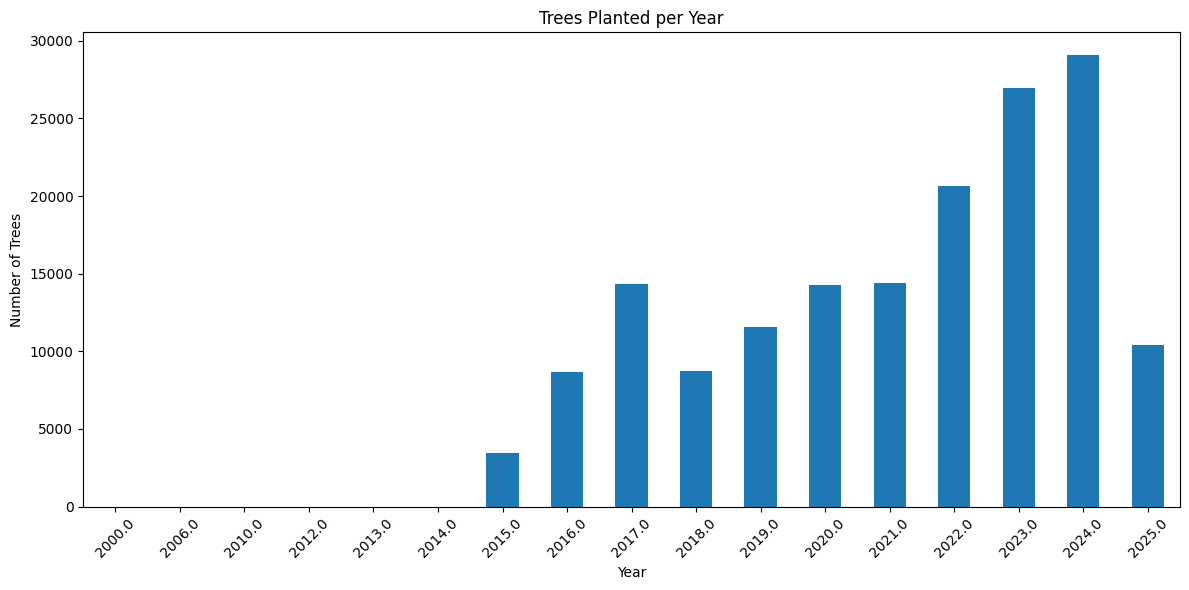

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # adjust width & height here
yearly_summary.groupby('year')['trees_planted'].sum().plot(kind='bar')
plt.title('Trees Planted per Year')
plt.xlabel('Year')
plt.ylabel('Number of Trees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [132]:
boroughs = yearly_summary['borough'].unique()
boroughs

array(['QUEENS', 'BRONX', 'UNSPECIFIED', 'MANHATTAN', nan,
       'STATEN ISLAND', 'BROOKLYN'], dtype=object)

In [133]:
print(yearly_summary[['year', 'trees_planted', 'borough']].dropna().head(10))
print(yearly_summary['borough'].unique())

      year  trees_planted    borough
30  2016.0            1.0  MANHATTAN
31  2017.0           21.0  MANHATTAN
32  2018.0            5.0  MANHATTAN
33  2019.0           14.0  MANHATTAN
34  2020.0           52.0  MANHATTAN
35  2021.0           39.0  MANHATTAN
36  2022.0           26.0  MANHATTAN
37  2023.0           58.0  MANHATTAN
38  2024.0           75.0  MANHATTAN
39  2025.0           12.0  MANHATTAN
['QUEENS' 'BRONX' 'UNSPECIFIED' 'MANHATTAN' nan 'STATEN ISLAND' 'BROOKLYN']


In [289]:
yearly_summary.groupby('borough')['trees_planted'].sum().sort_values(ascending=False)

borough
UNSPECIFIED      38170.0
QUEENS           37823.0
BROOKLYN         37349.0
BRONX            23317.0
MANHATTAN        14912.0
STATEN ISLAND    10917.0
Name: trees_planted, dtype: float64

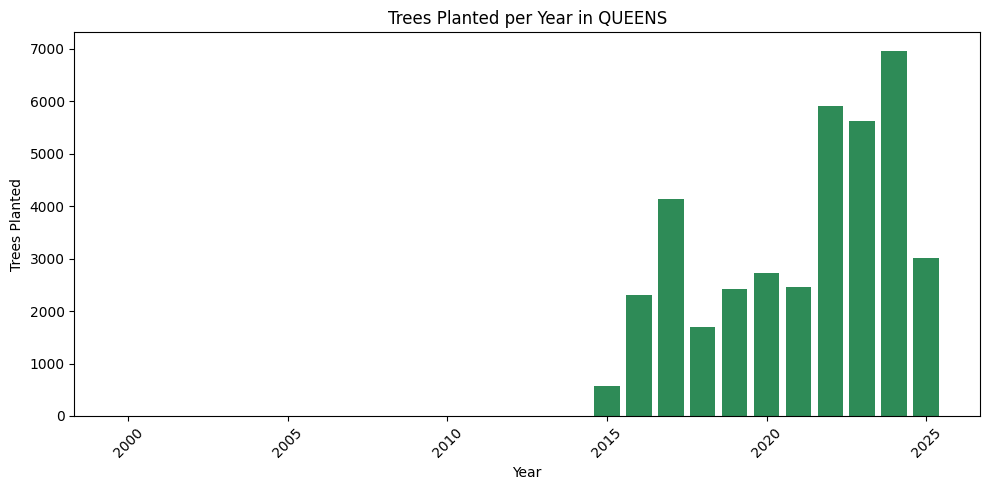

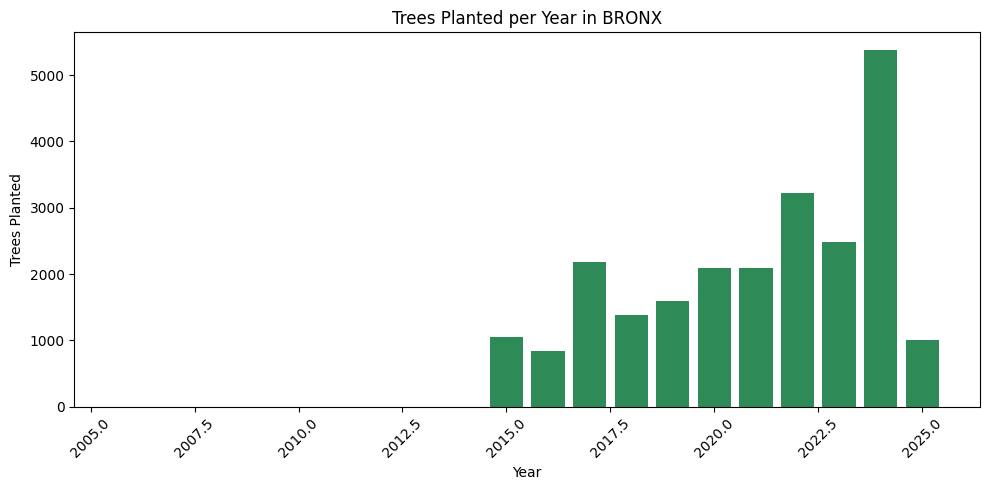

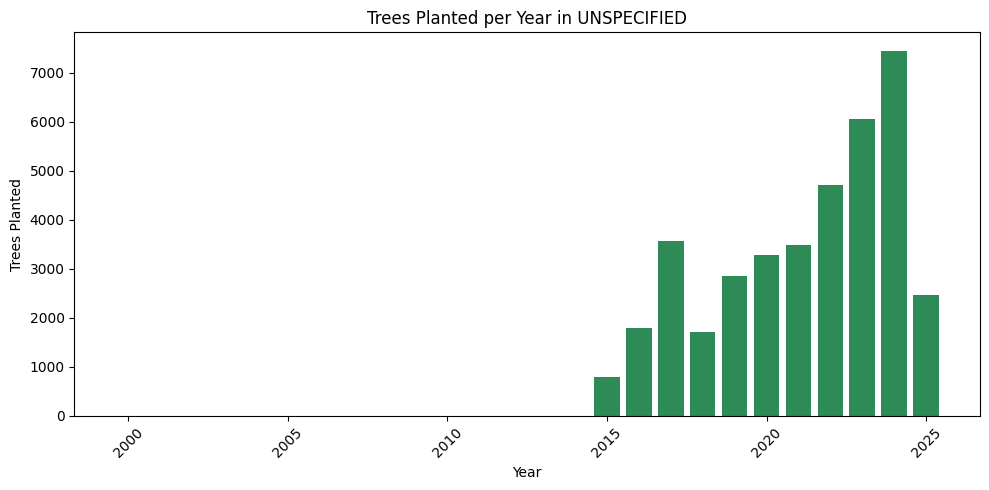

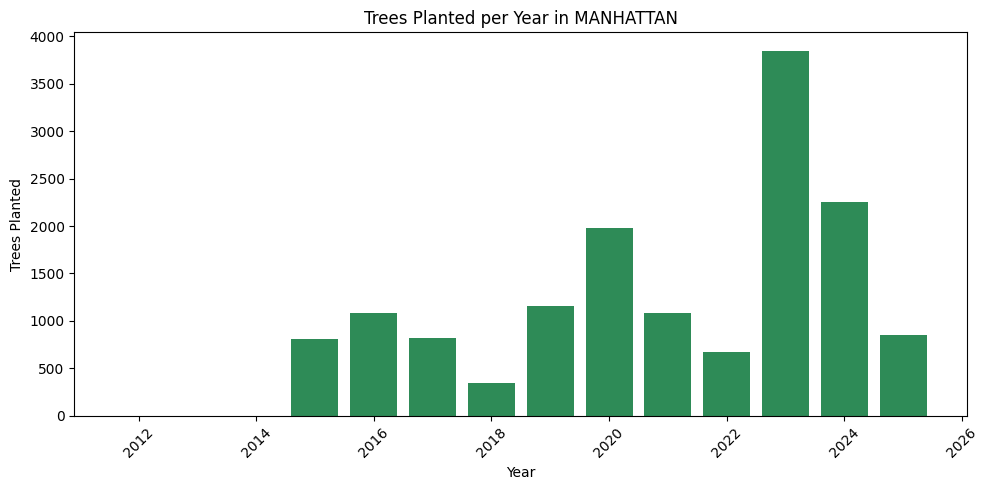

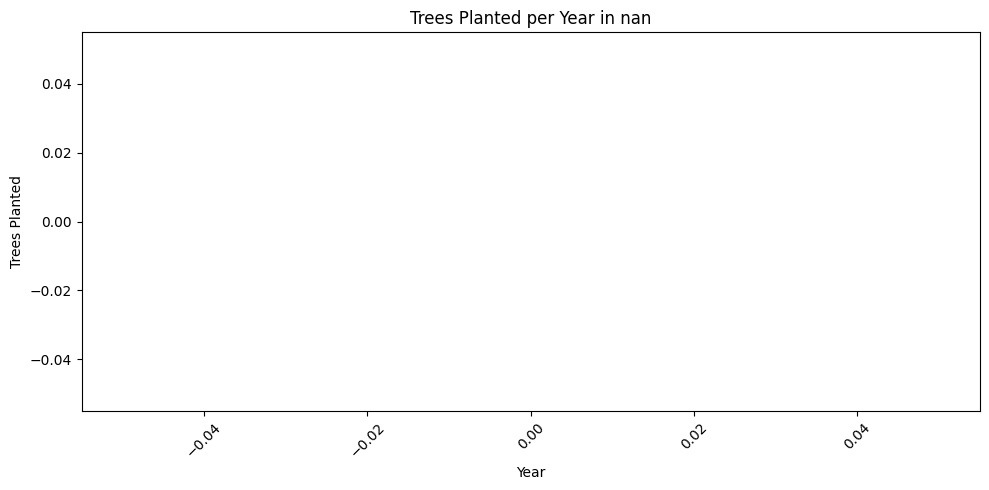

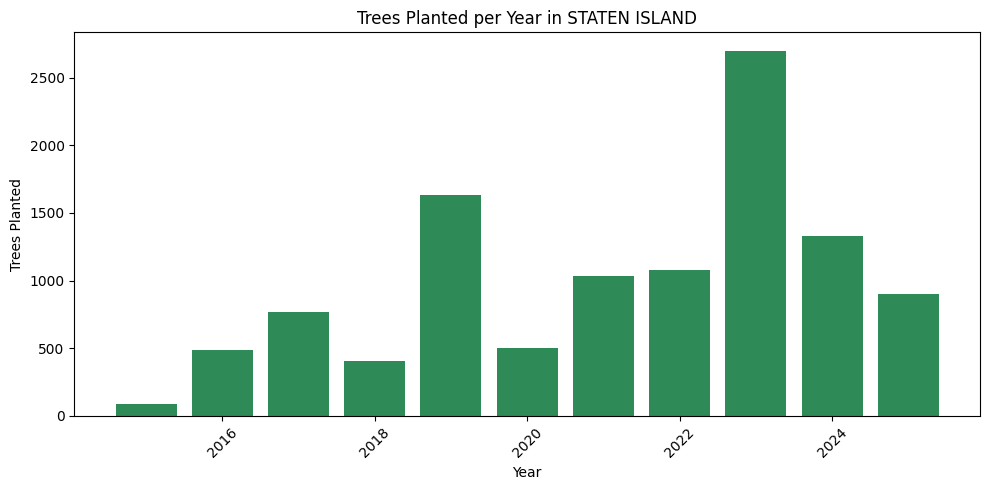

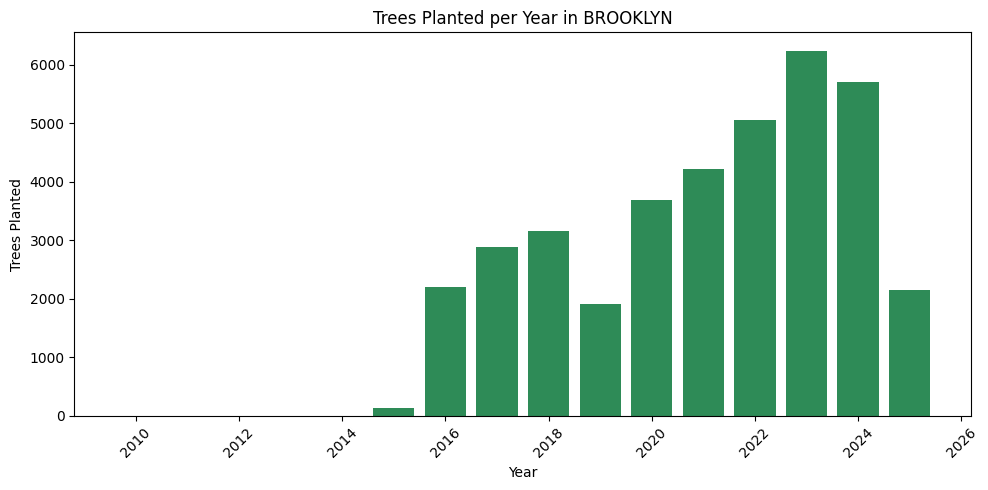

In [134]:
boroughs = yearly_summary['borough'].unique()

for b in boroughs:
    subset = yearly_summary[yearly_summary['borough'] == b]
    summary = subset.groupby('year')['trees_planted'].sum().reset_index()

    plt.figure(figsize=(10, 5))
    plt.bar(summary['year'], summary['trees_planted'], color='seagreen')
    plt.title(f'Trees Planted per Year in {b}')
    plt.xlabel('Year')
    plt.ylabel('Trees Planted')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [137]:
trees_summary = (
    yearly_summary.groupby(['year', 'borough'])['trees_planted']
    .sum()
    .reset_index()
)

In [138]:
pivot_df = trees_summary.pivot(index='year', columns='borough', values='trees_planted')

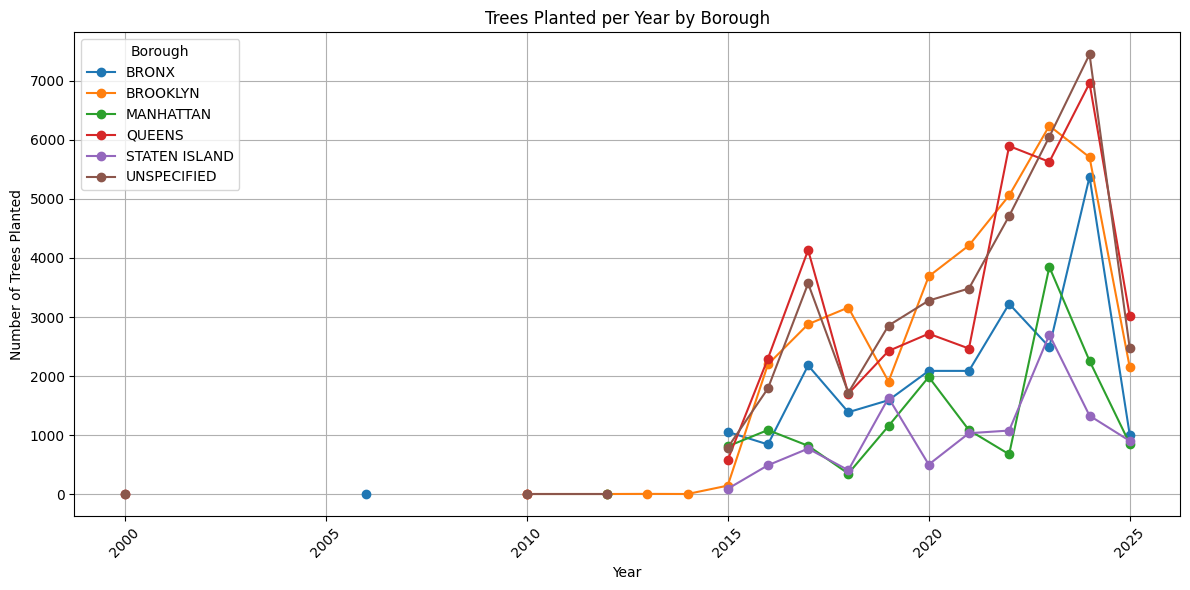

In [139]:
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='line', marker='o', ax=plt.gca())

plt.title('Trees Planted per Year by Borough')
plt.xlabel('Year')
plt.ylabel('Number of Trees Planted')
plt.xticks(rotation=45)
plt.legend(title='Borough')
plt.grid(True)
plt.tight_layout()
plt.show()

### Trees planted have increased in all boroughs, but the biggest jump in new trees planted in 2024 was in the Bronx 

In [154]:
yearly_summary.shape

(3535, 5)

In [155]:
yearly_summary.dtypes

zip_code          object
year             float64
trees_planted    float64
borough           object
complaints       float64
dtype: object

In [158]:
bronx_df = yearly_summary[yearly_summary['borough'] == 'BRONX']

In [160]:
ymin = 0  # Usually zero makes sense for counts
ymax = max(
    bronx_df['trees_planted'].max(),
    bronx_df['complaints'].max()
)

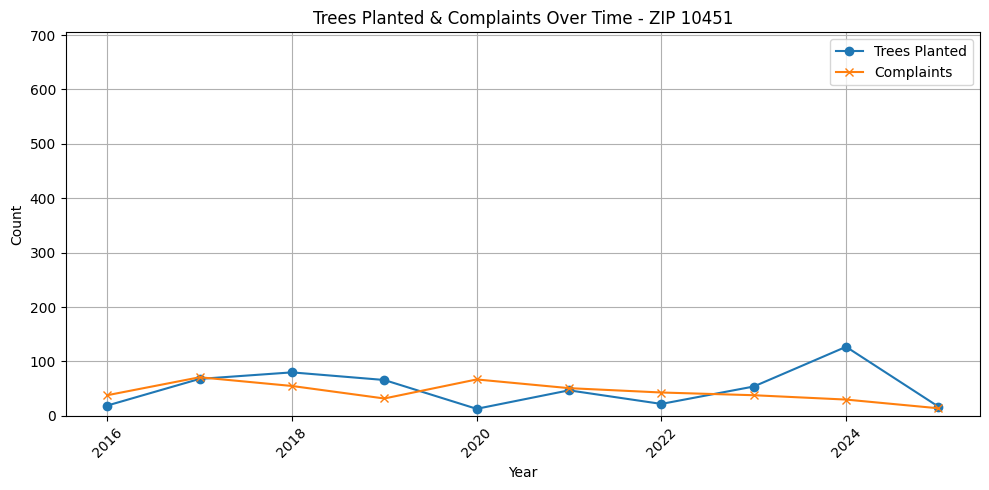

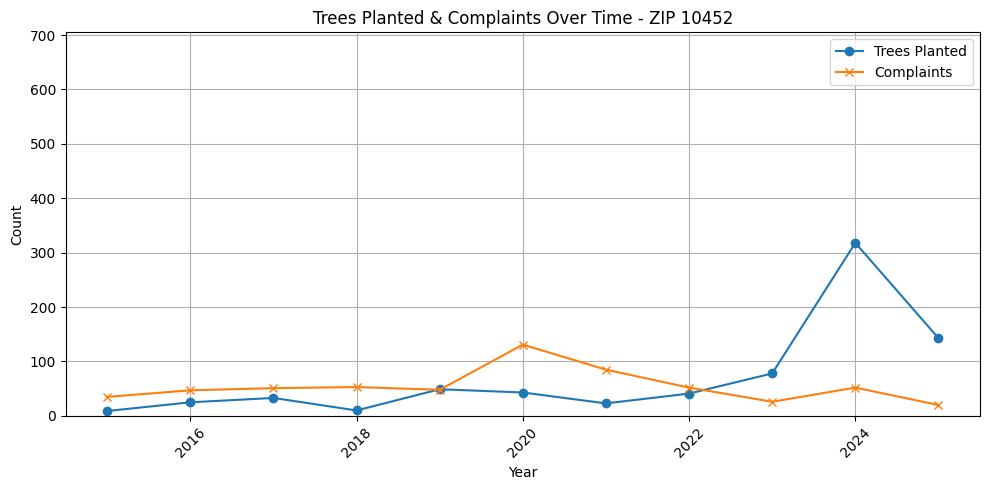

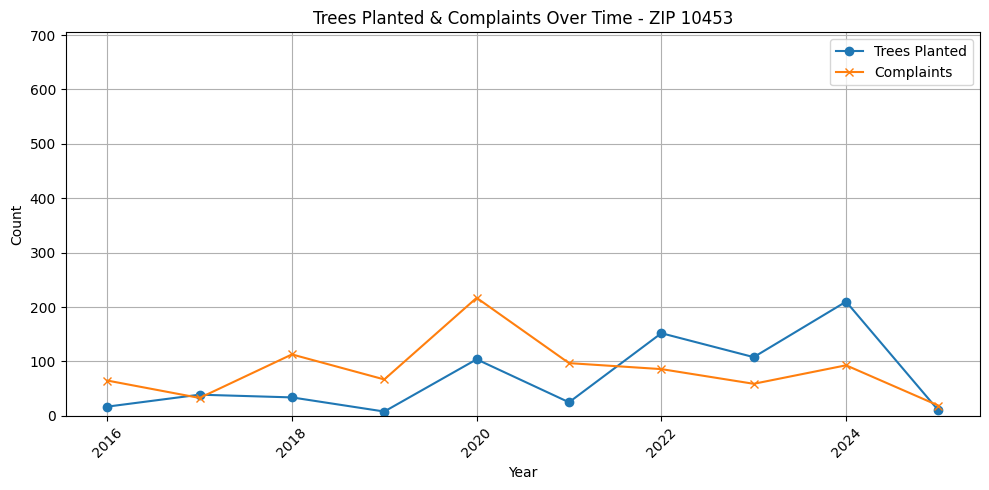

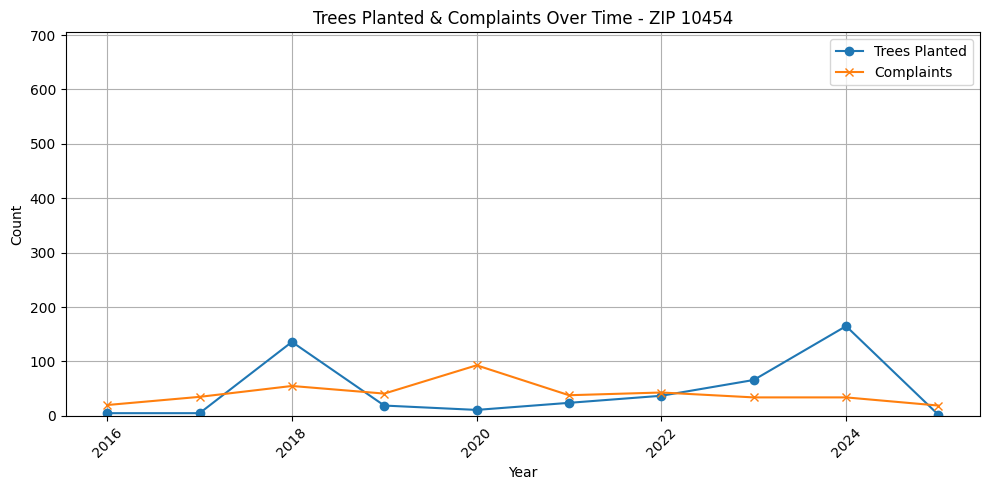

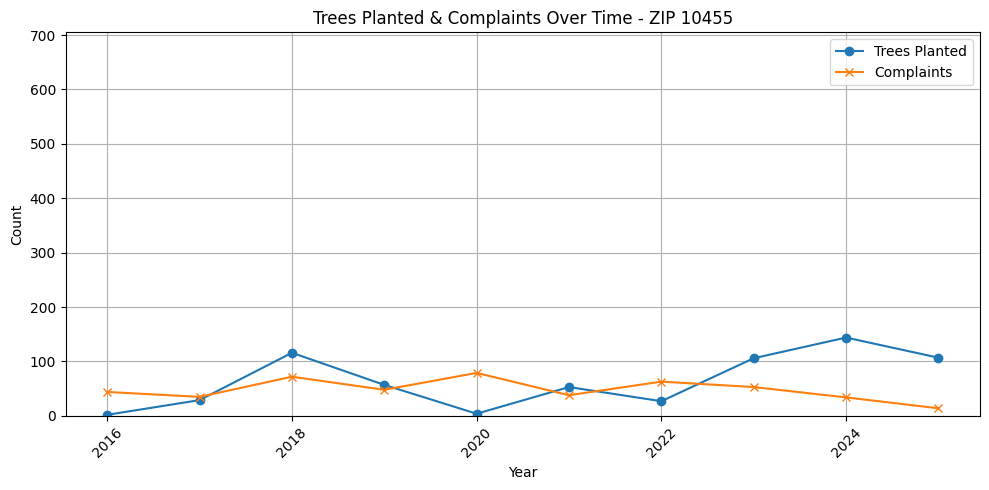

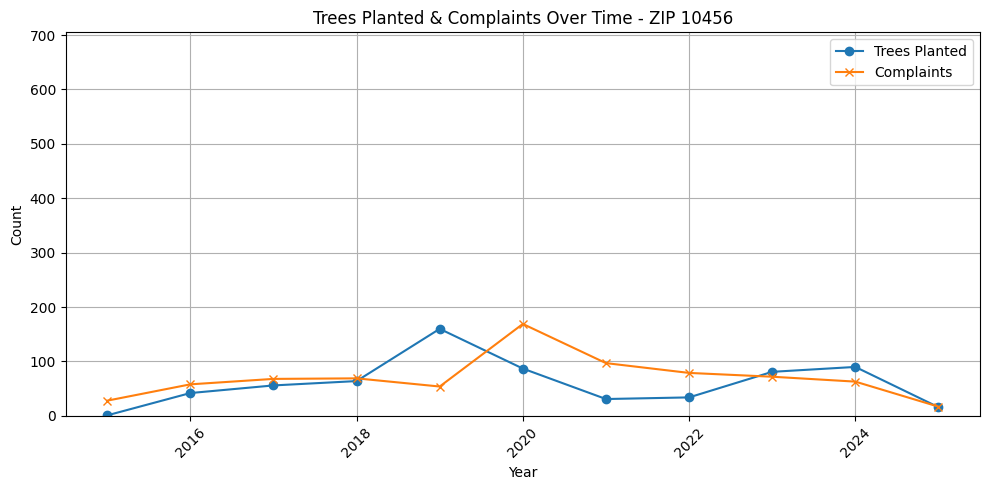

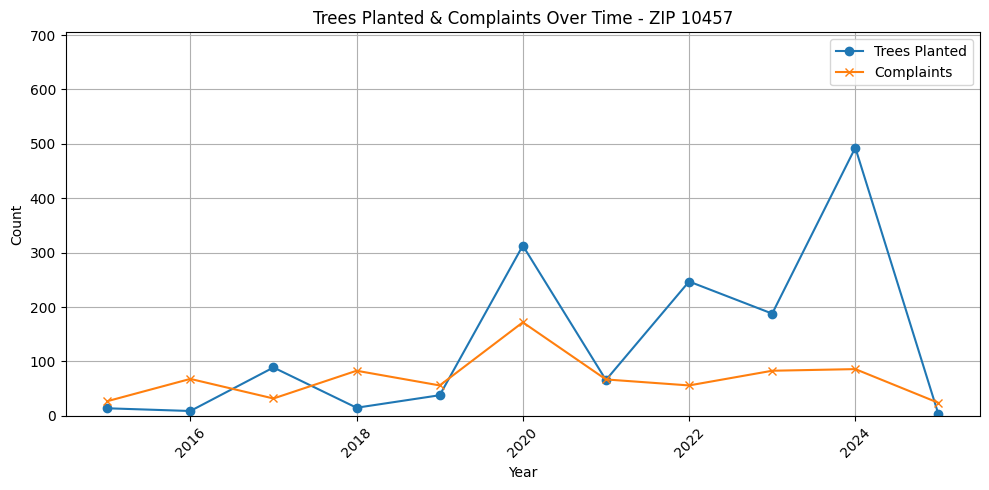

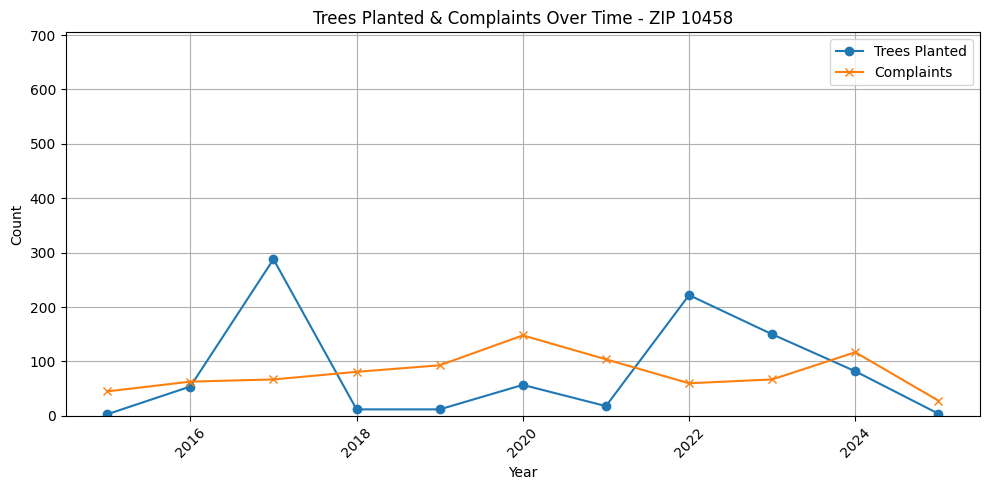

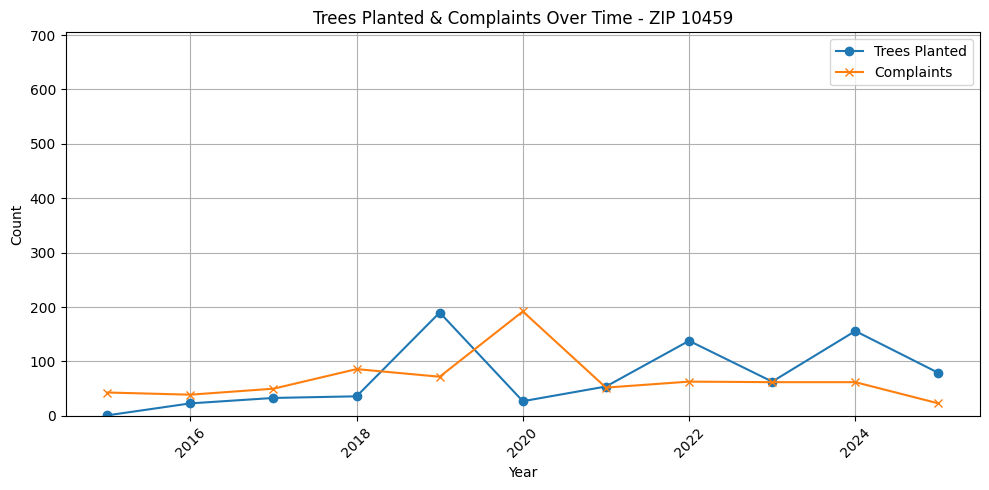

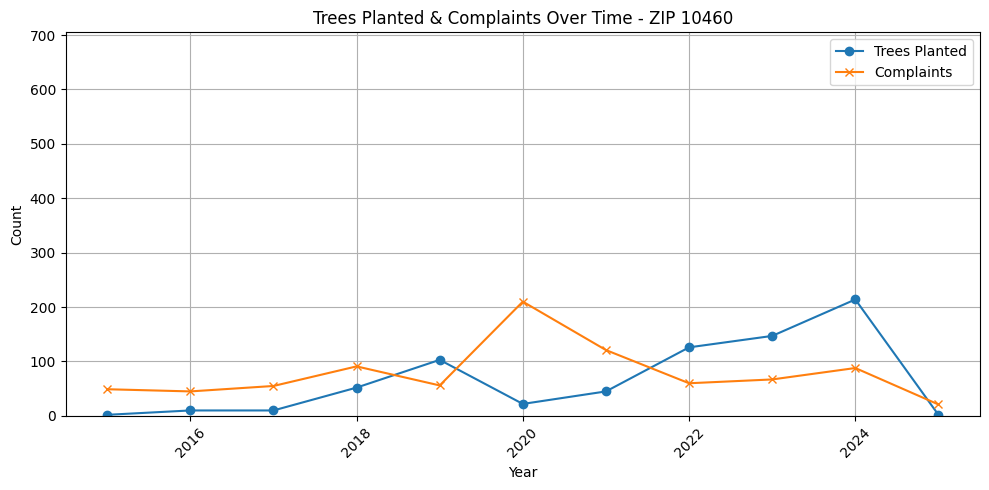

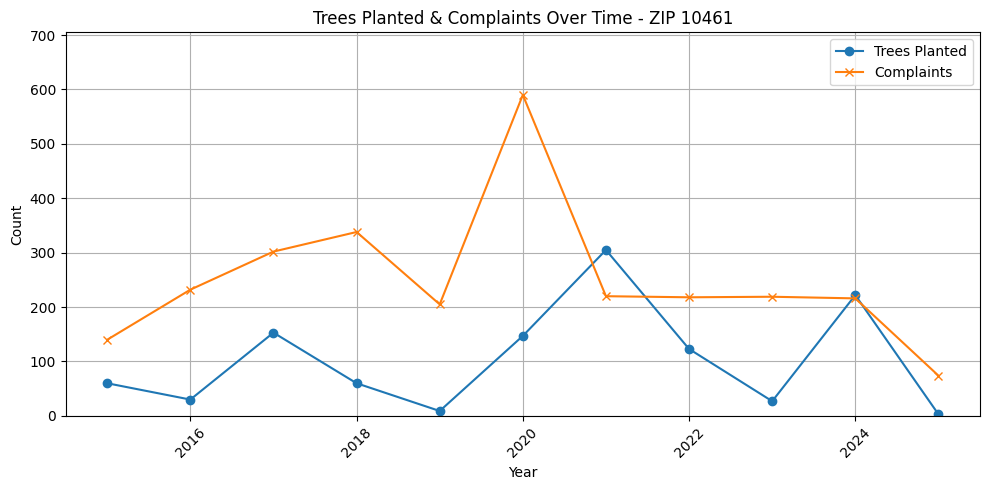

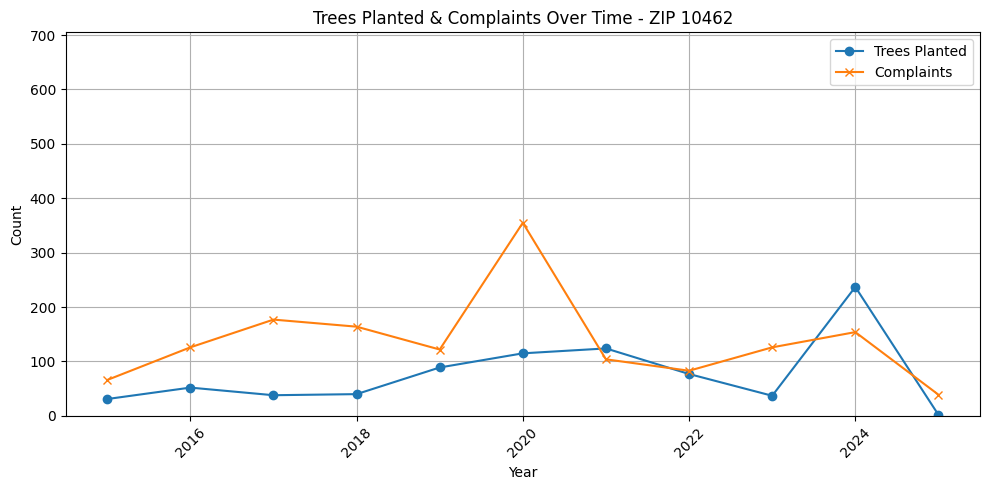

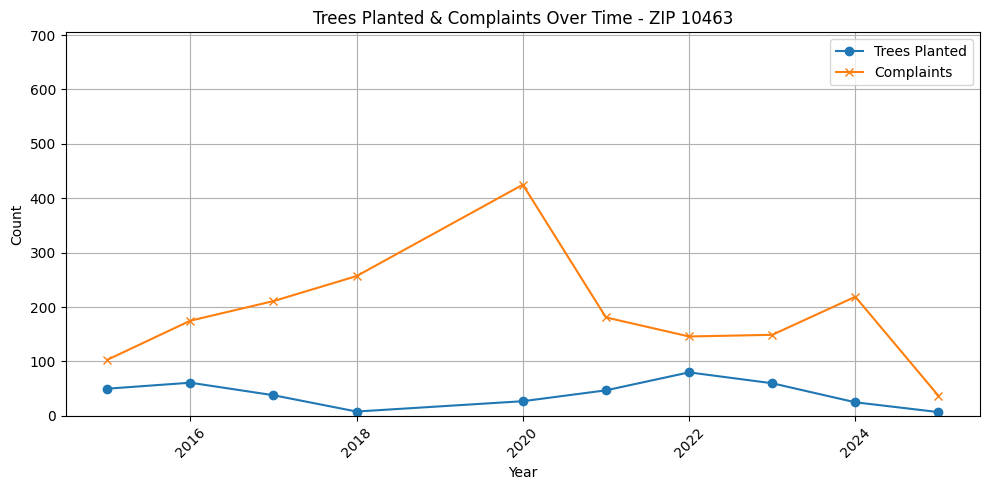

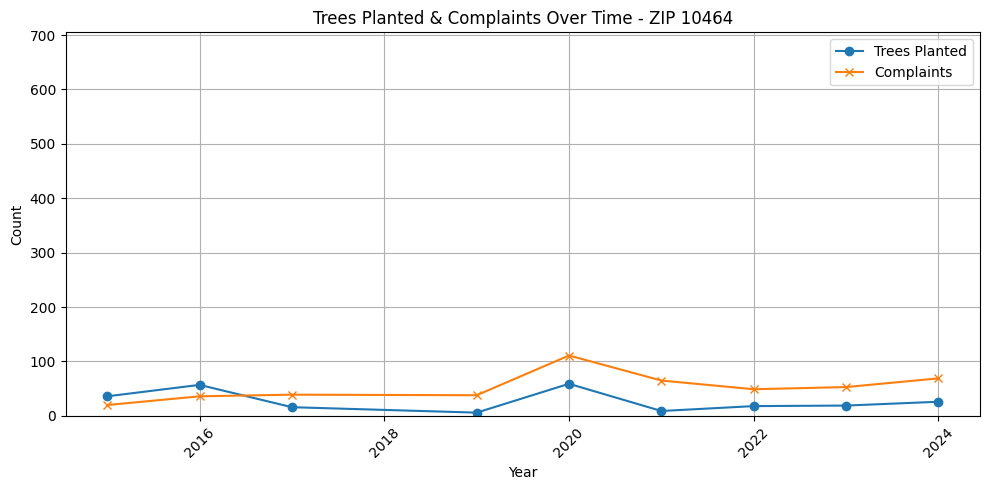

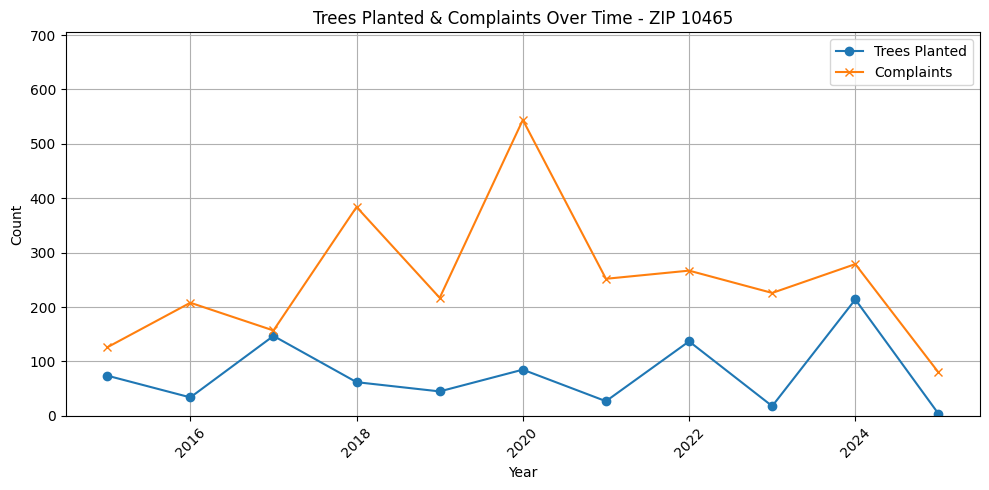

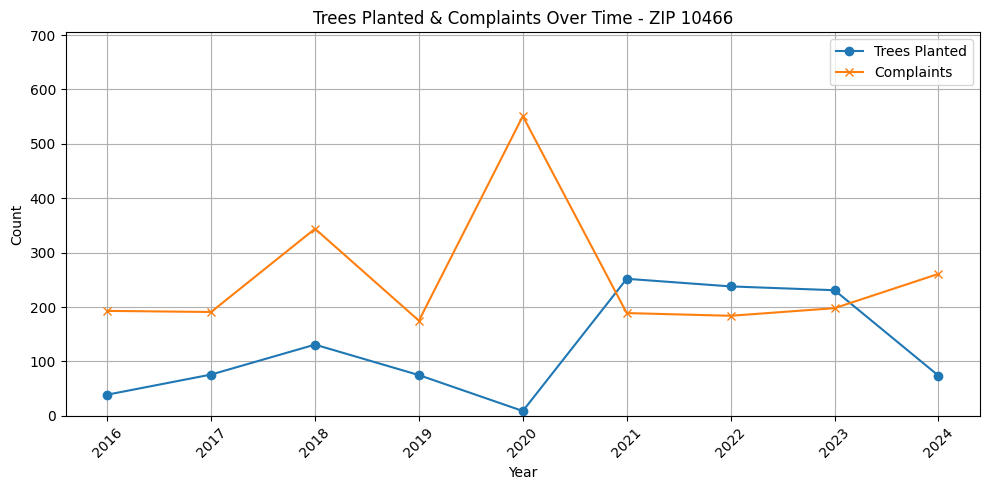

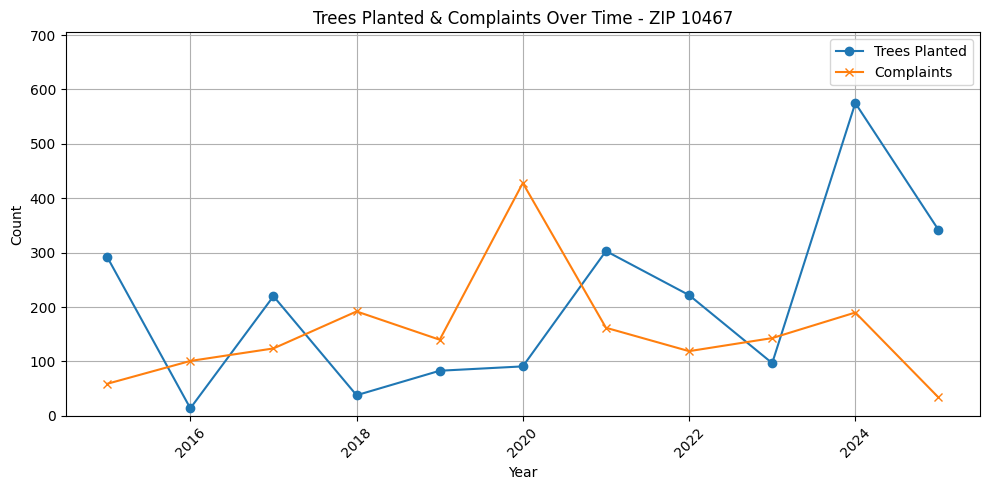

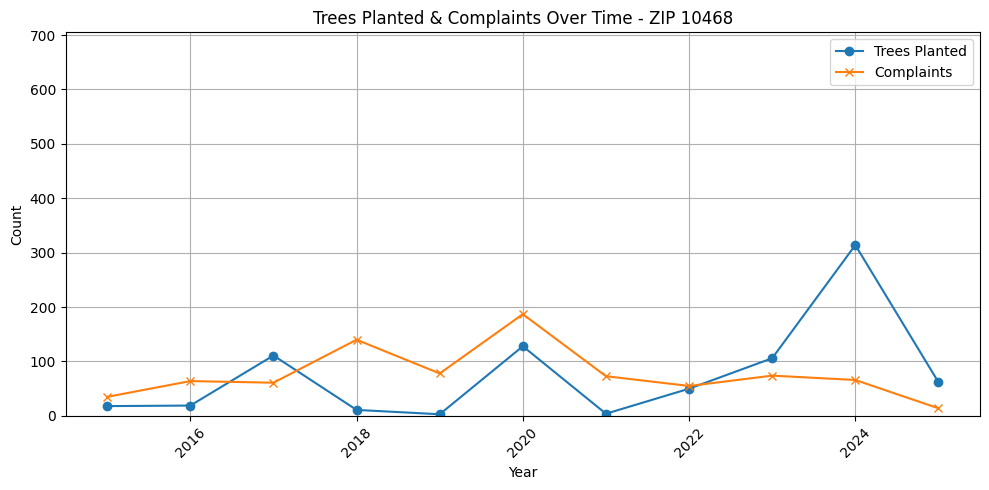

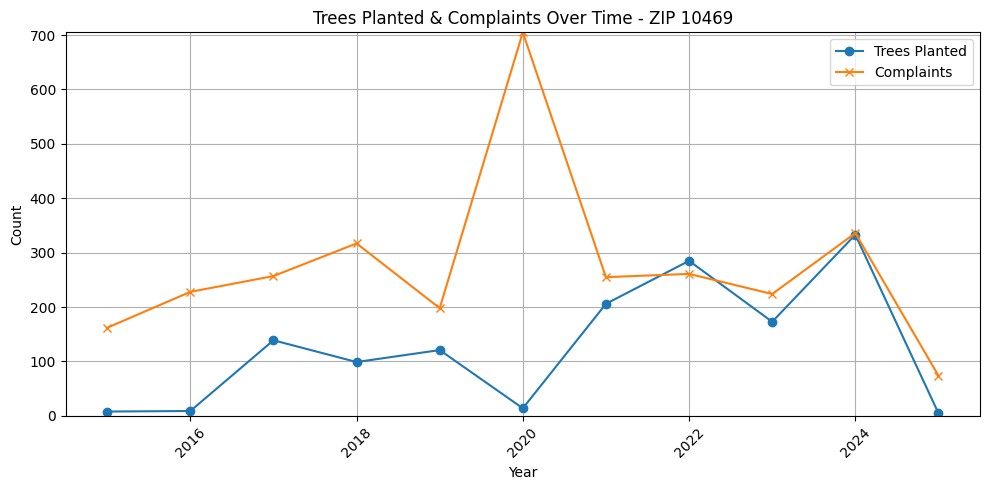

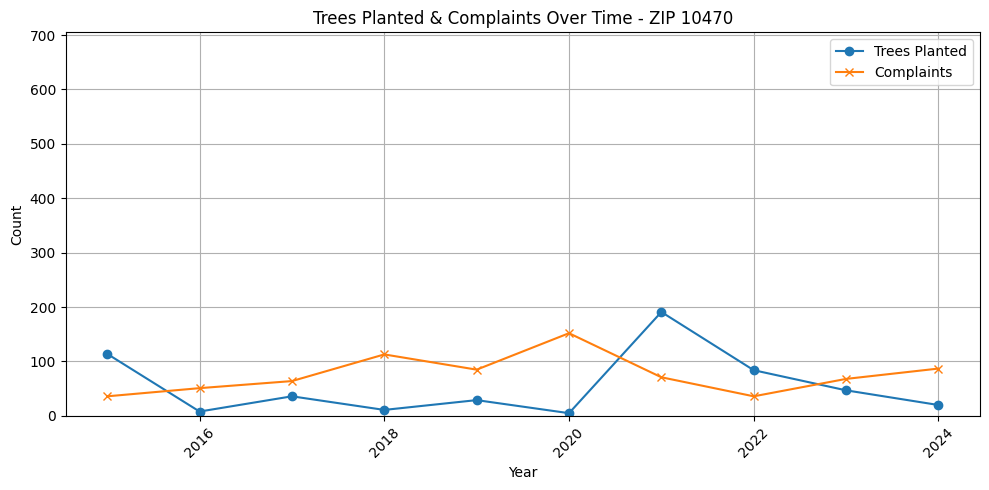

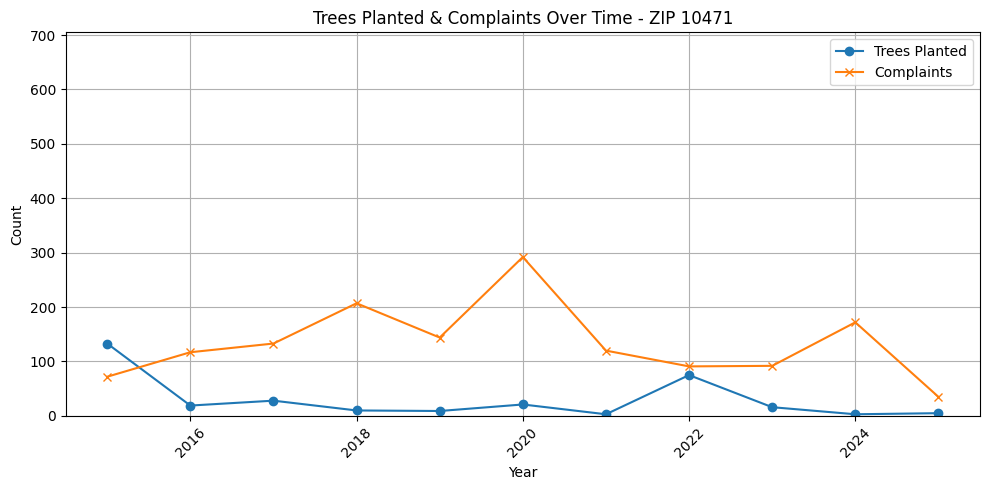

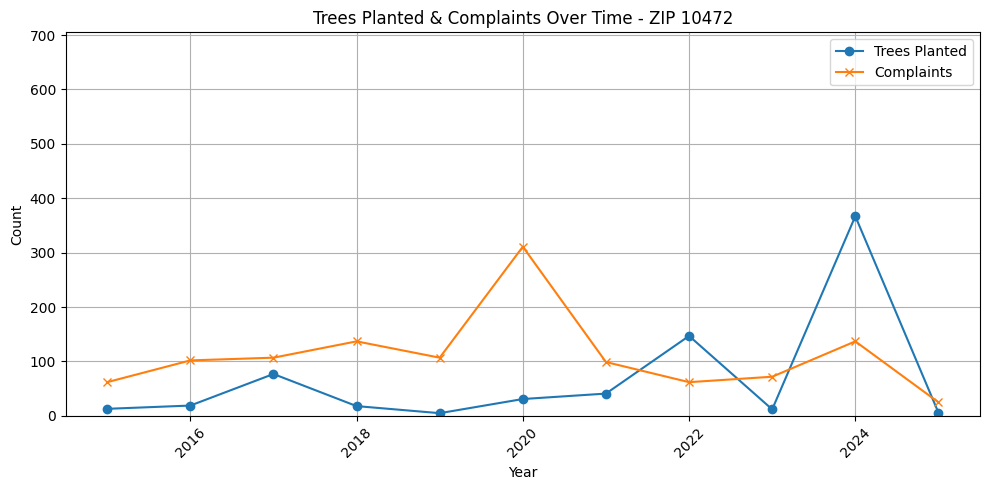

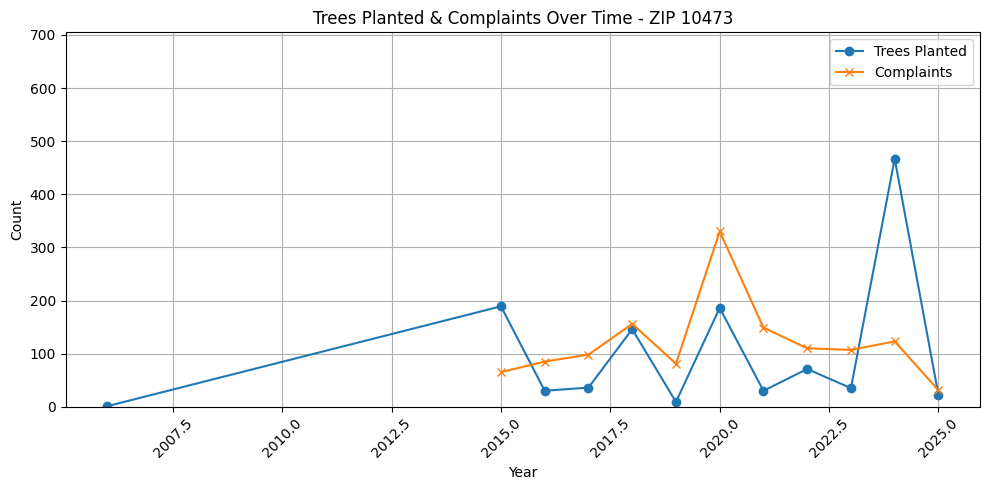

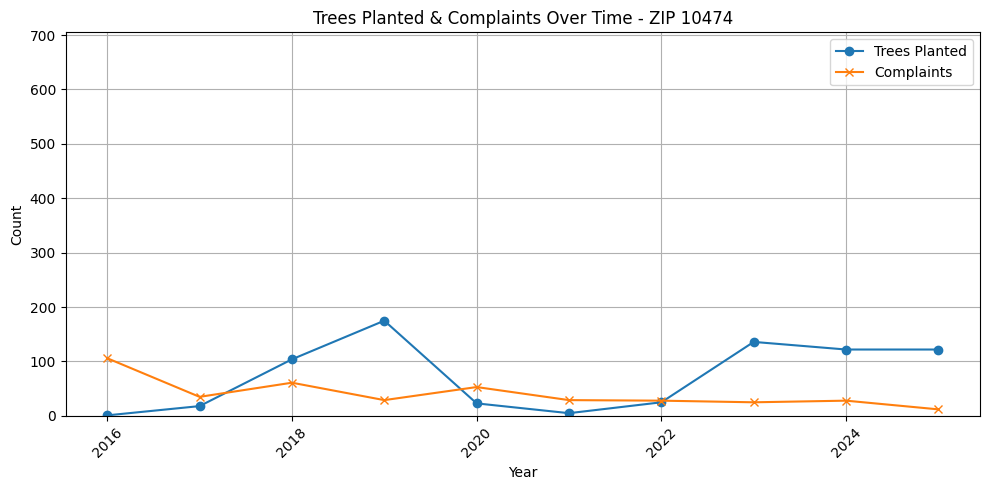

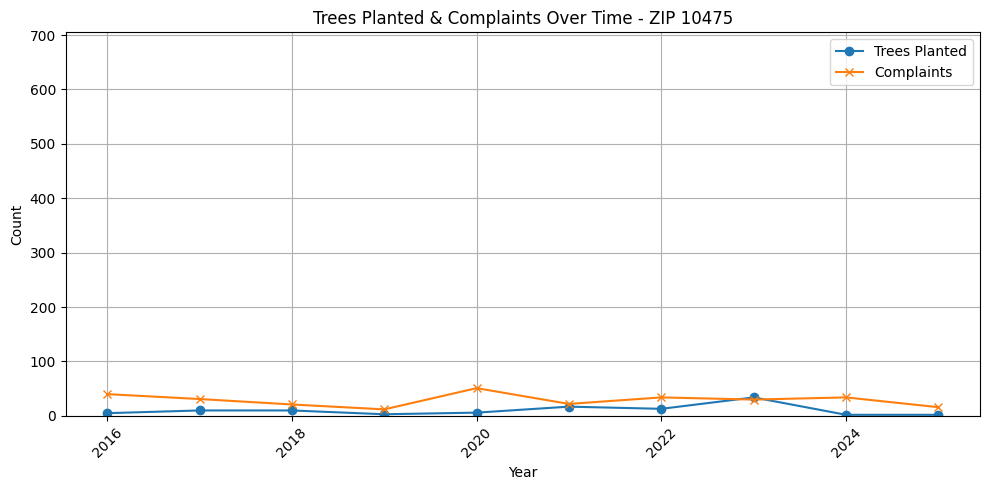

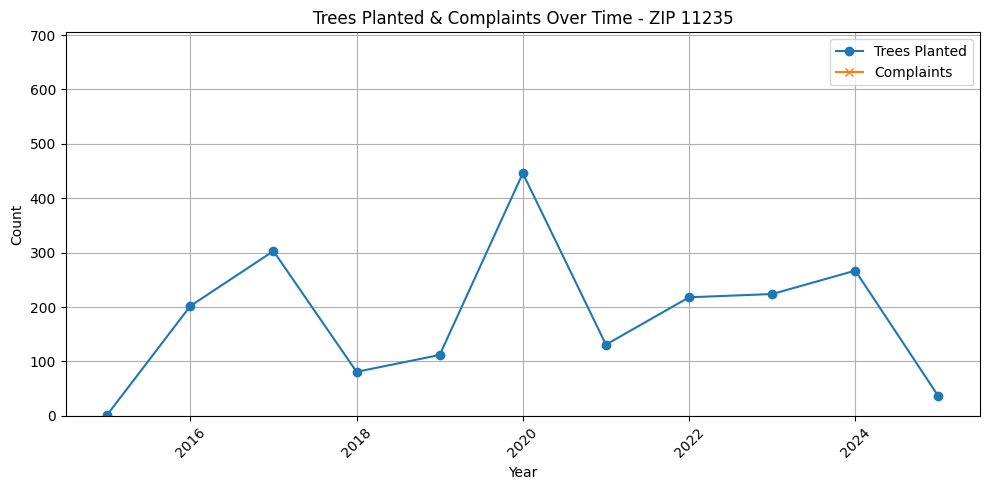

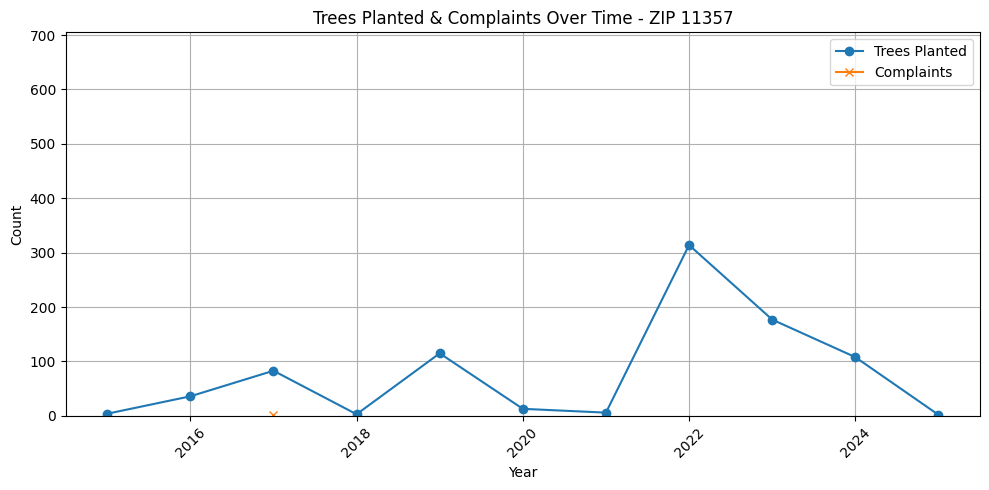

In [161]:
zip_codes = bronx_df['zip_code'].dropna().unique()

for zip_code in zip_codes:
    subset = bronx_df[bronx_df['zip_code'] == zip_code].sort_values('year')
    if subset.empty:
        continue

    plt.figure(figsize=(10, 5))

    plt.plot(subset['year'], subset['trees_planted'], marker='o', label='Trees Planted')
    plt.plot(subset['year'], subset['complaints'], marker='x', label='Complaints')

    plt.title(f'Trees Planted & Complaints Over Time - ZIP {zip_code}')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.ylim(ymin, ymax)  # Set the same y axis limits for all
    plt.tight_layout()
    plt.grid(True)
    plt.show()

In [213]:
pop = pd.read_csv('acs2023_5yr_B01003_86000US10010.csv')

In [215]:
trees_pop = yearly_summary.merge(pop, left_on='zip_code', right_on='name', how='left')

In [218]:
trees_pop.head(50)

zip_code    year  trees_planted      borough  complaints         geoid  \
0       NaN     NaN            NaN       QUEENS         1.0           NaN   
1       NaN     NaN            NaN        BRONX         1.0           NaN   
2       NaN     NaN            NaN       QUEENS         1.0           NaN   
3       NaN     NaN            NaN       QUEENS         1.0           NaN   
4       NaN     NaN            NaN        BRONX         1.0           NaN   
5       NaN     NaN            NaN  UNSPECIFIED         1.0           NaN   
6       NaN     NaN            NaN    MANHATTAN         1.0           NaN   
7       NaN     NaN            NaN    MANHATTAN         1.0           NaN   
8       NaN     NaN            NaN    MANHATTAN         1.0           NaN   
9       NaN     NaN            NaN    MANHATTAN         2.0           NaN   
10      NaN     NaN            NaN       QUEENS         1.0           NaN   
11      NaN     NaN            NaN       QUEENS         1.0           NaN   
12      NaN     NaN            NaN    MANHATTAN        11.0           NaN   
13      NaN     NaN            NaN    MANHATTAN         3.0           NaN   
14      NaN     NaN            NaN    MANHATTAN         1.0           NaN   
15      NaN     NaN            NaN    MANHATTAN         2.0           NaN   
16      NaN     NaN            NaN    MANHATTAN         2.0           NaN   
17      NaN     NaN            NaN    MANHATTAN         1.0           NaN   
18      NaN     NaN            NaN    MANHATTAN         3.0           NaN   
19      NaN     NaN            NaN    MANHATTAN         1.0           NaN   
20      NaN     NaN            NaN    MANHATTAN         3.0           NaN   
21      NaN     NaN            NaN    MANHATTAN         4.0           NaN   
22      NaN     NaN            NaN    MANHATTAN         1.0           NaN   
23      NaN     NaN            NaN    MANHATTAN         1.0           NaN   
24      NaN     NaN            NaN    MANHATTAN        20.0           NaN   
25      NaN     NaN            NaN    MANHATTAN         8.0           NaN   
26      NaN     NaN            NaN    MANHATTAN        19.0           NaN   
27      NaN     NaN            NaN    MANHATTAN         7.0           NaN   
28      NaN     NaN            NaN    MANHATTAN         5.0           NaN   
29      NaN     NaN            NaN    MANHATTAN        14.0           NaN   
30    10001  2016.0            1.0    MANHATTAN         6.0  86000US10001   
31    10001  2017.0           21.0    MANHATTAN        13.0  86000US10001   
32    10001  2018.0            5.0    MANHATTAN        23.0  86000US10001   
33    10001  2019.0           14.0    MANHATTAN        23.0  86000US10001   
34    10001  2020.0           52.0    MANHATTAN        16.0  86000US10001   
35    10001  2021.0           39.0    MANHATTAN        15.0  86000US10001   
36    10001  2022.0           26.0    MANHATTAN         4.0  86000US10001   
37    10001  2023.0           58.0    MANHATTAN        17.0  86000US10001   
38    10001  2024.0           75.0    MANHATTAN        21.0  86000US10001   
39    10001  2025.0           12.0    MANHATTAN        17.0  86000US10001   
40      NaN     NaN            NaN    MANHATTAN        34.0           NaN   
41      NaN     NaN            NaN    MANHATTAN        43.0           NaN   
42      NaN     NaN            NaN    MANHATTAN        44.0           NaN   
43      NaN     NaN            NaN    MANHATTAN        30.0           NaN   
44      NaN     NaN            NaN    MANHATTAN        36.0           NaN   
45    10002  2015.0           51.0    MANHATTAN        53.0  86000US10002   
46    10002  2016.0            3.0    MANHATTAN        47.0  86000US10002   
47    10002  2017.0           38.0    MANHATTAN        46.0  86000US10002   
48    10002  2018.0           31.0    MANHATTAN       122.0  86000US10002   
49    10002  2019.0          149.0    MANHATTAN        29.0  86000US10002   

     name  B01003001  B01003001, Error  
0     NaN        NaN              

In [219]:
trees_pop['population'] = trees_pop['B01003001']

In [221]:
trees_pop = trees_pop.drop(columns=['B01003001','B01003001, Error','geoid'])

In [222]:
trees_pop.head()

zip_code  year  trees_planted borough  complaints name  population
0      NaN   NaN            NaN  QUEENS         1.0  NaN         NaN
1      NaN   NaN            NaN   BRONX         1.0  NaN         NaN
2      NaN   NaN            NaN  QUEENS         1.0  NaN         NaN
3      NaN   NaN            NaN  QUEENS         1.0  NaN         NaN
4      NaN   NaN            NaN   BRONX         1.0  NaN         NaN

In [223]:
trees_pop['trees_per_1000'] = trees_pop['trees_planted'] / trees_pop['population'] *1000

In [225]:
trees_pop['complaints_per_1000'] = trees_pop['complaints'] / trees_pop['population'] *1000

In [226]:
trees_pop.to_csv('trees_and_complaints_yearly.csv',index=False)

In [264]:
bronx_df = trees_pop[trees_pop['borough'] == 'BRONX']

In [265]:
bronx_df.head()

zip_code  year  trees_planted borough  complaints name  population  \
1         NaN   NaN            NaN   BRONX         1.0  NaN         NaN   
4         NaN   NaN            NaN   BRONX         1.0  NaN         NaN   
1012      NaN   NaN            NaN   BRONX        40.0  NaN         NaN   
1013      NaN   NaN            NaN   BRONX        22.0  NaN         NaN   
1014      NaN   NaN            NaN   BRONX        40.0  NaN         NaN   

      trees_per_1000  complaints_per_1000  
1                NaN                  NaN  
4                NaN                  NaN  
1012             NaN                  NaN  
1013             NaN                  NaN  
1014             NaN                  NaN

In [270]:
ymin = 0  
ymax = max(
    bronx_df['trees_per_1000'].max(),
    bronx_df['complaints_per_1000'].max()
)

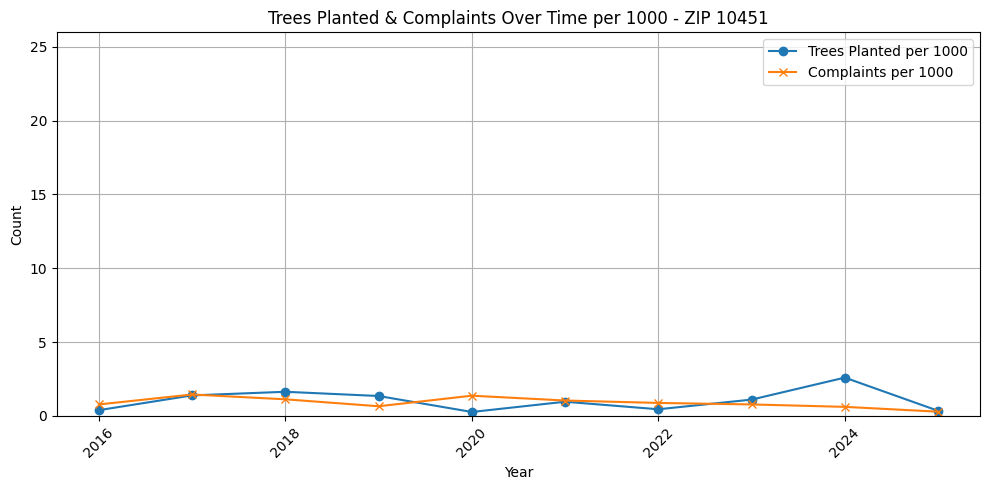

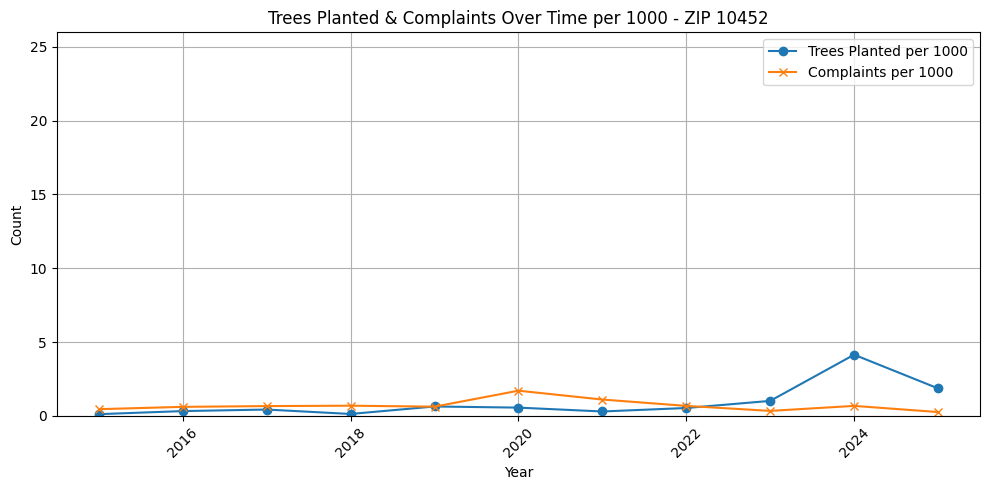

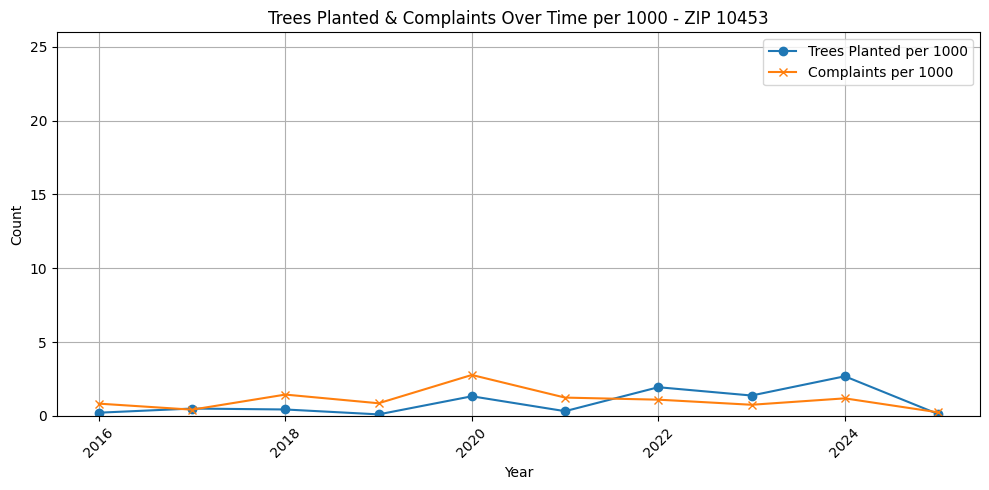

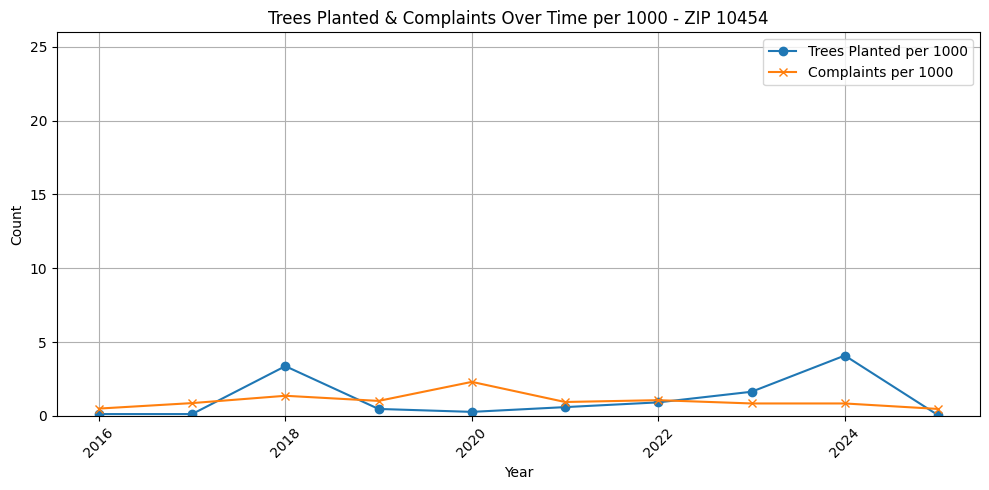

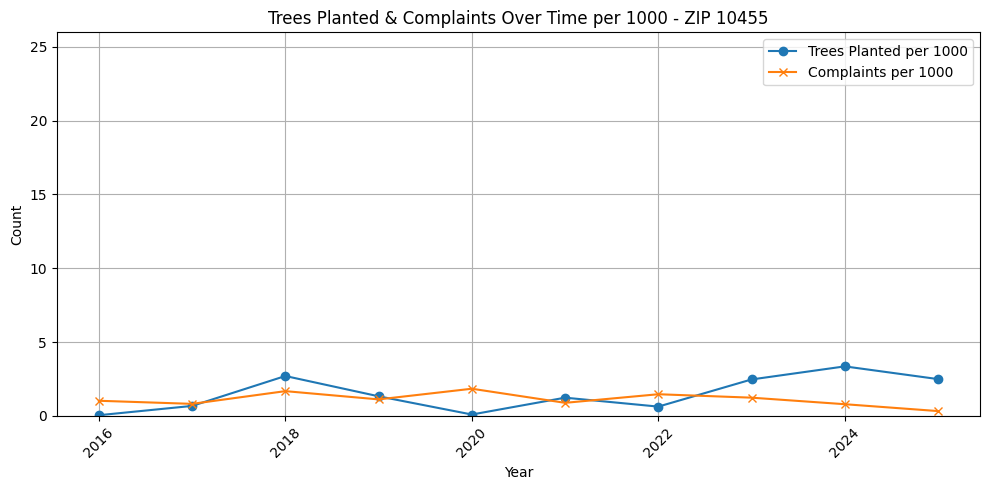

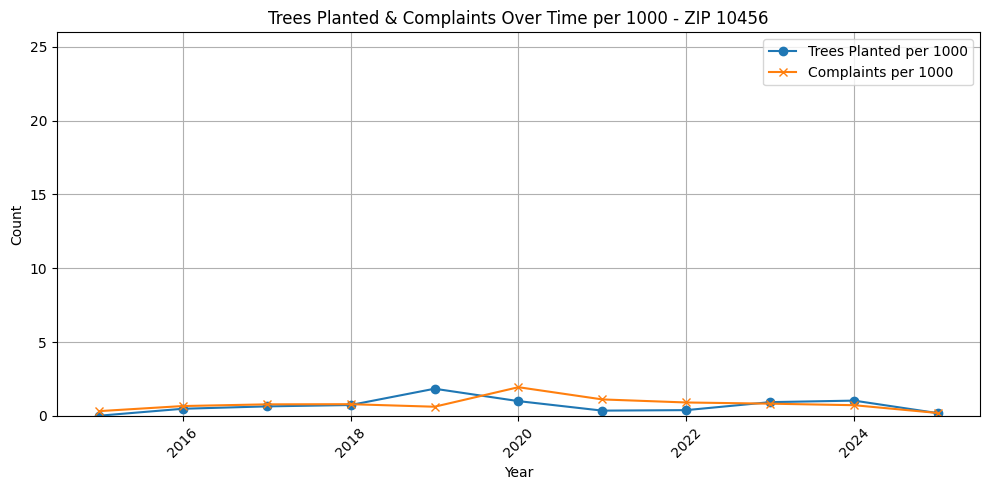

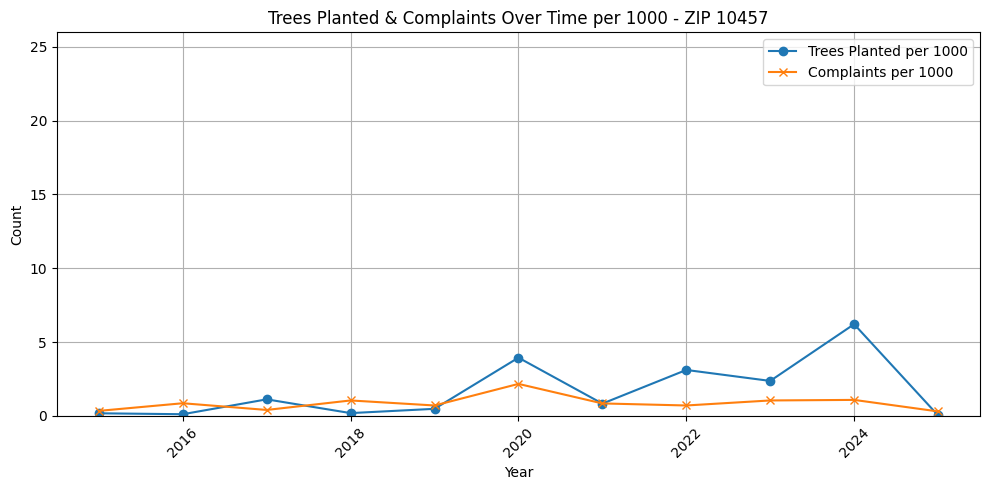

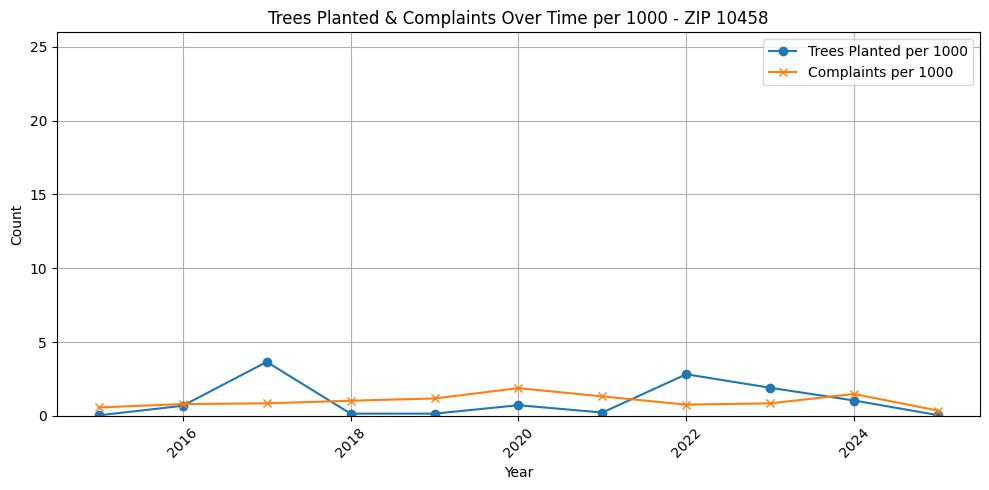

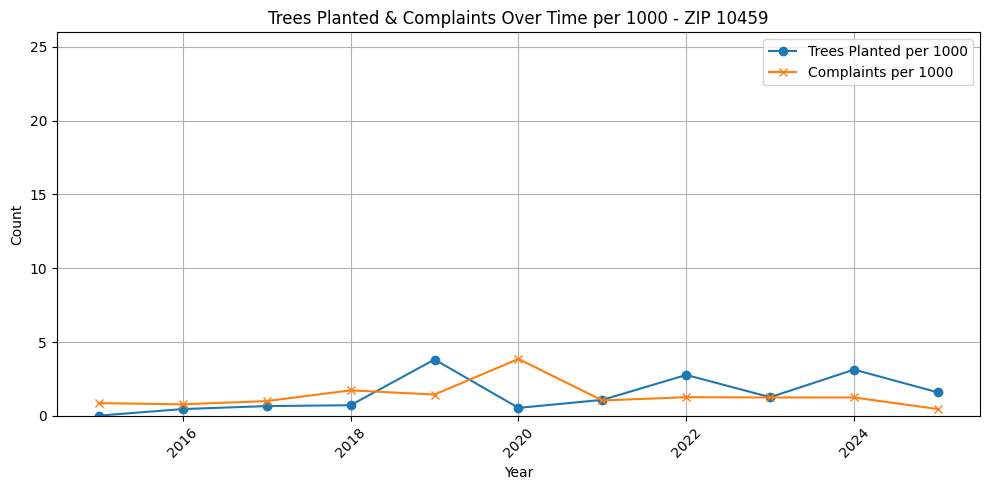

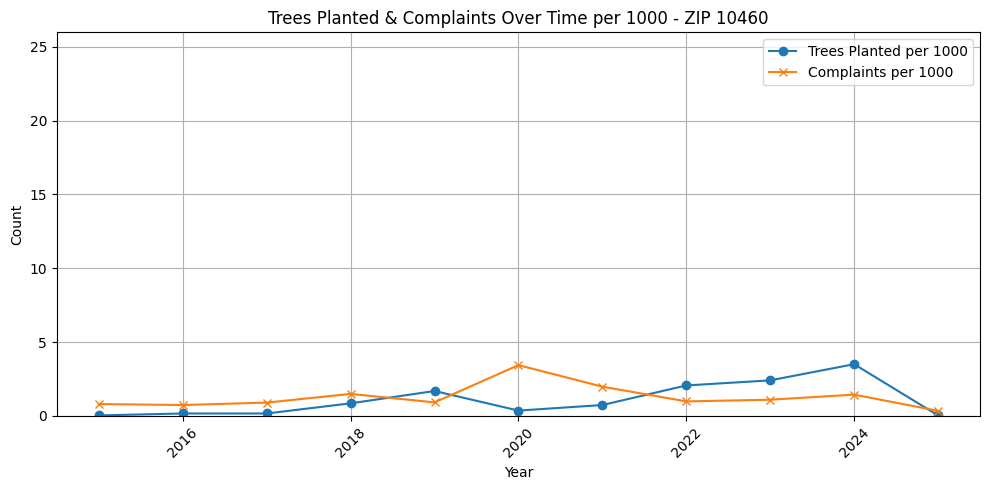

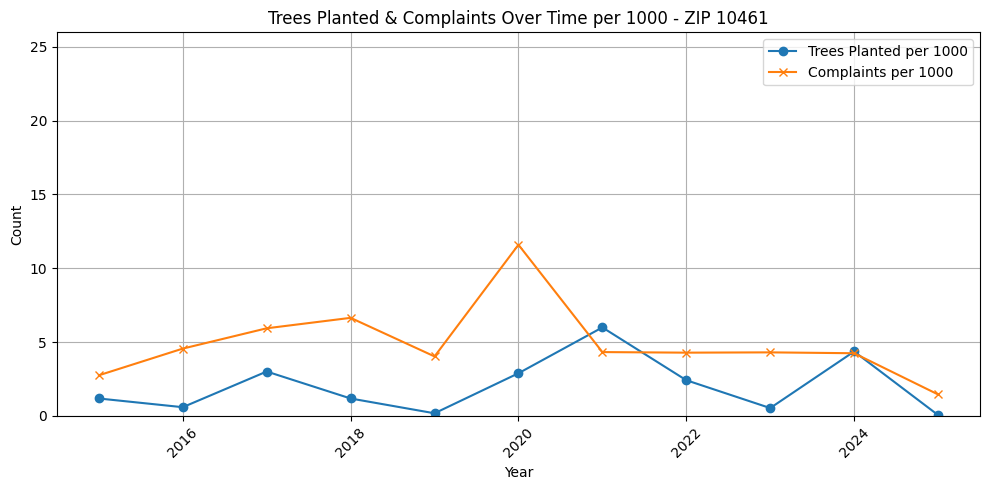

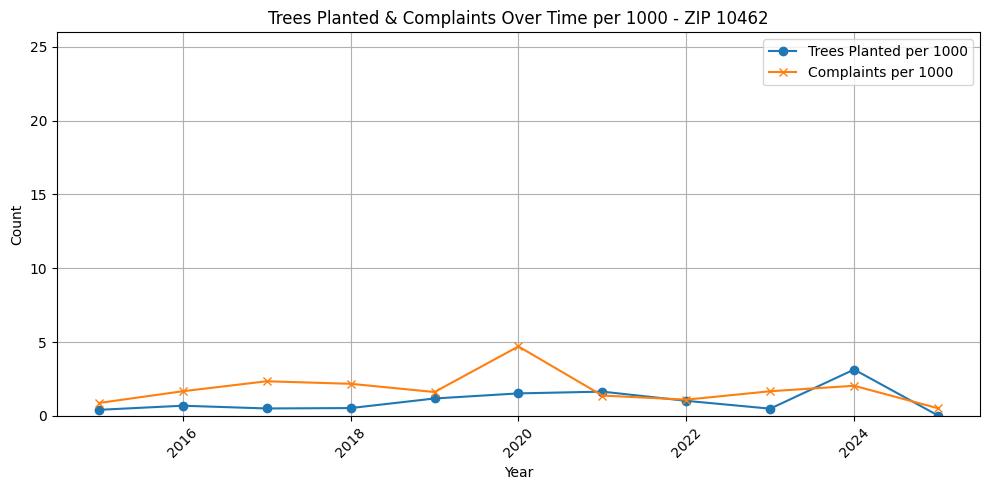

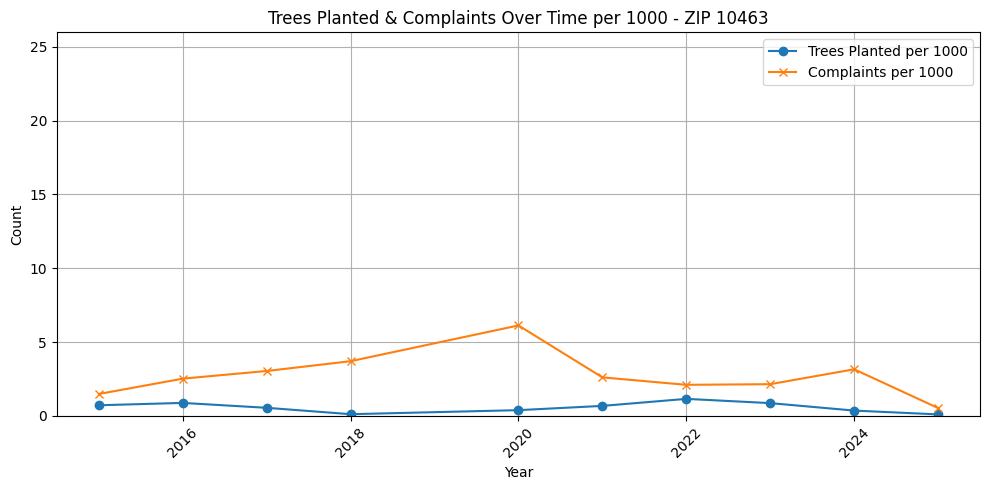

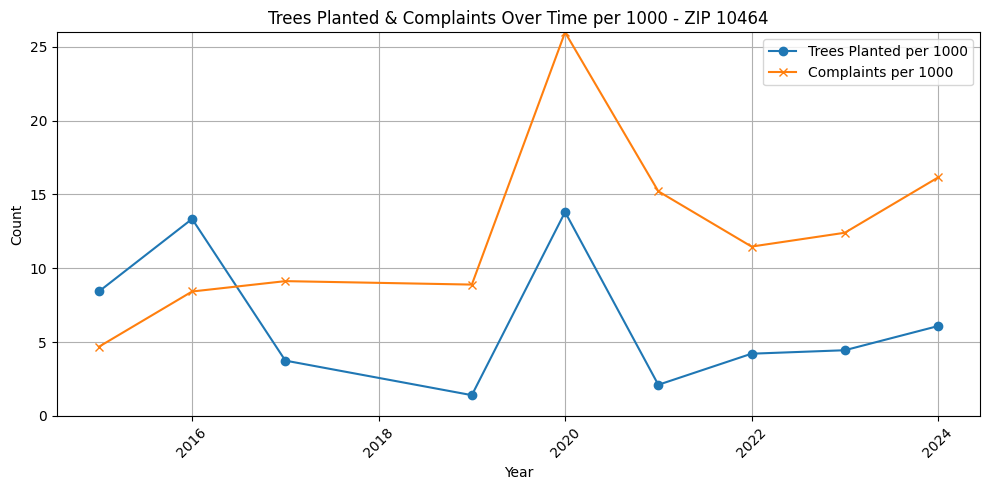

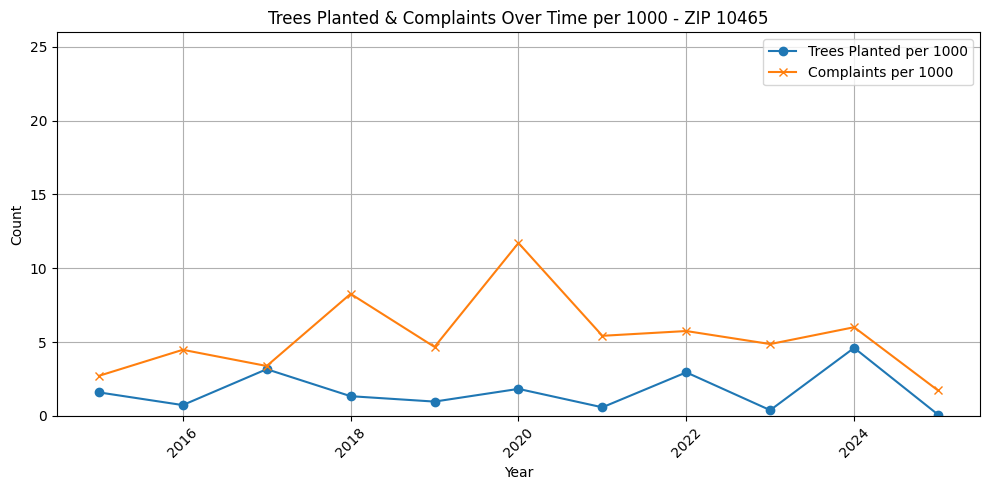

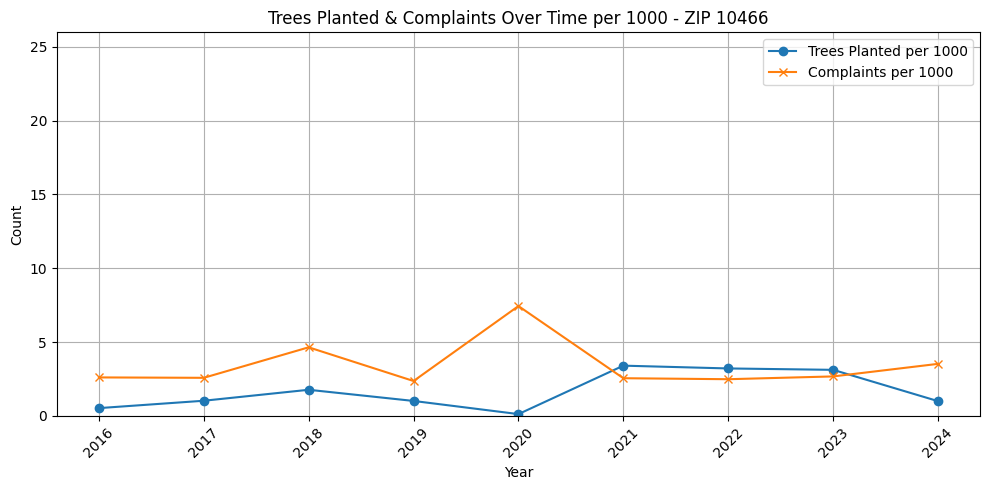

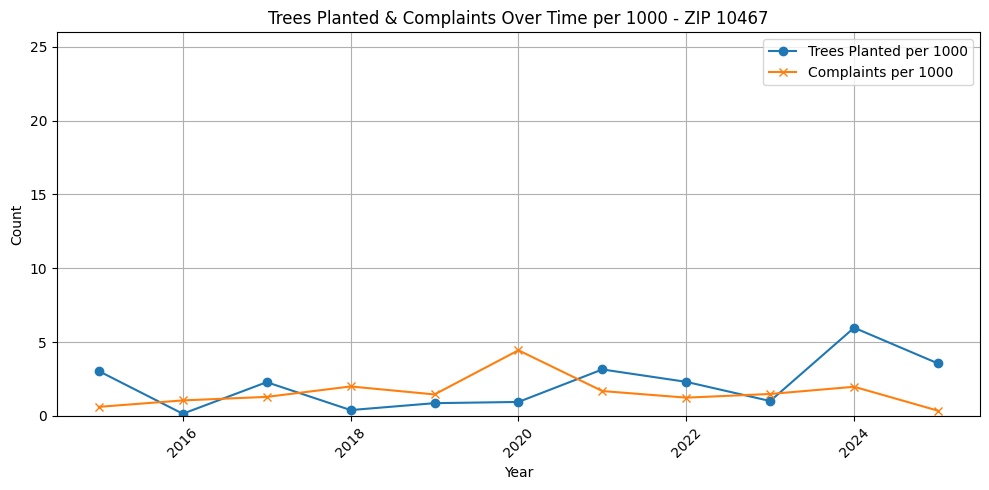

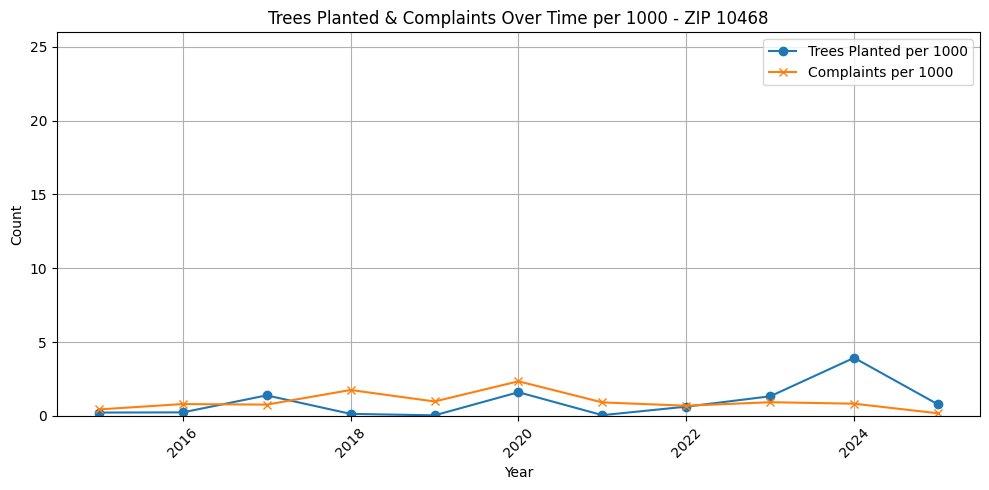

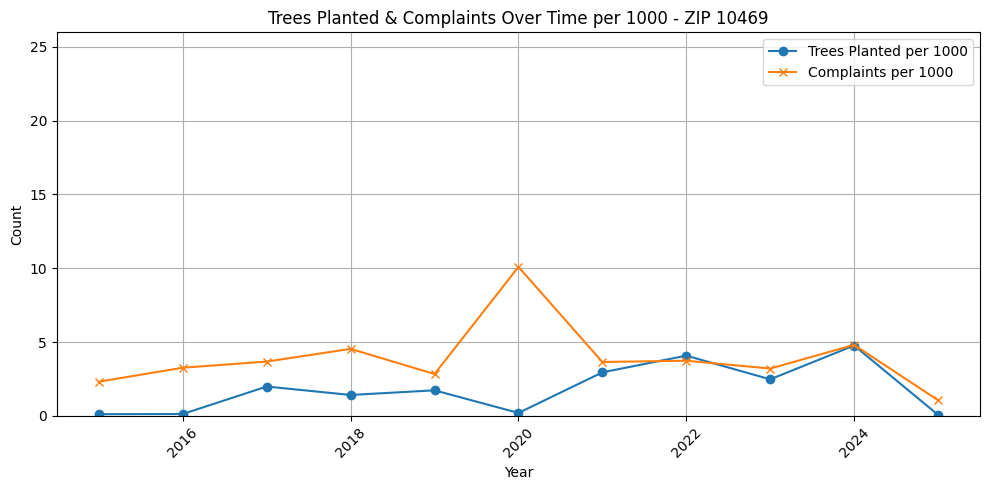

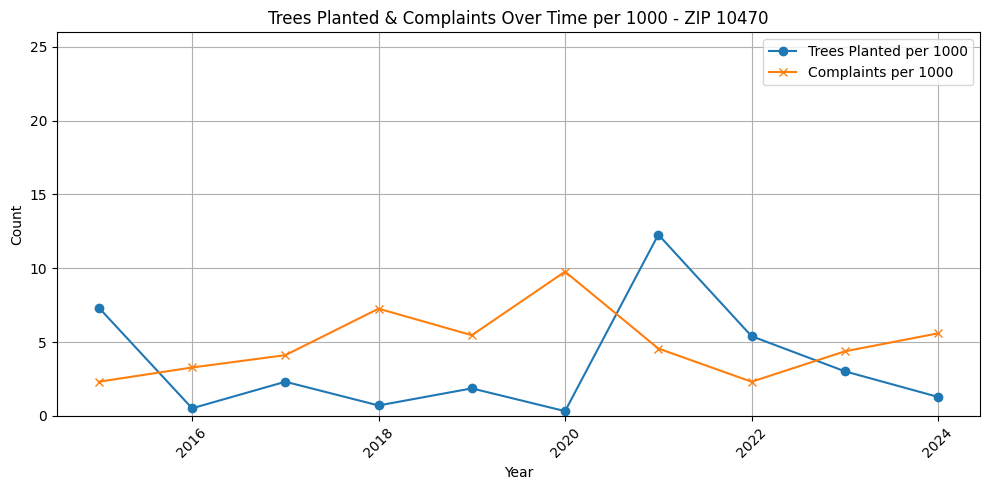

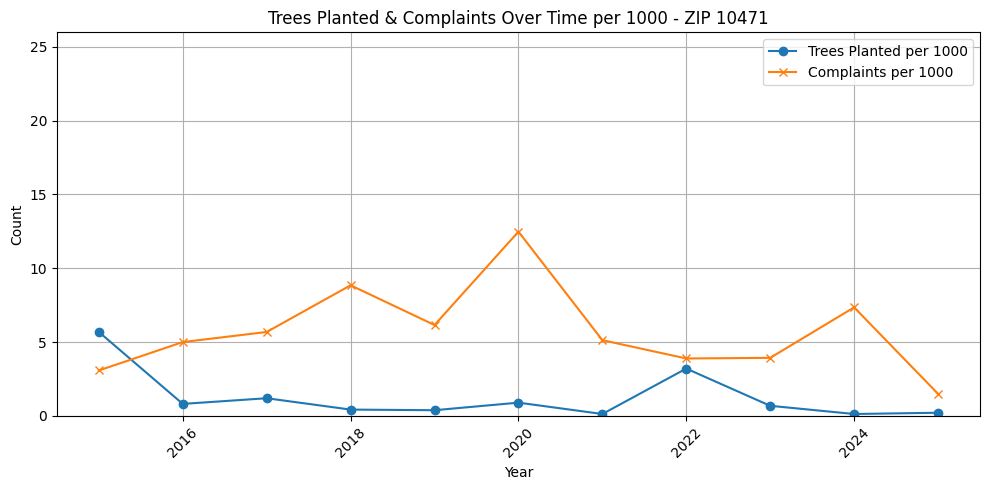

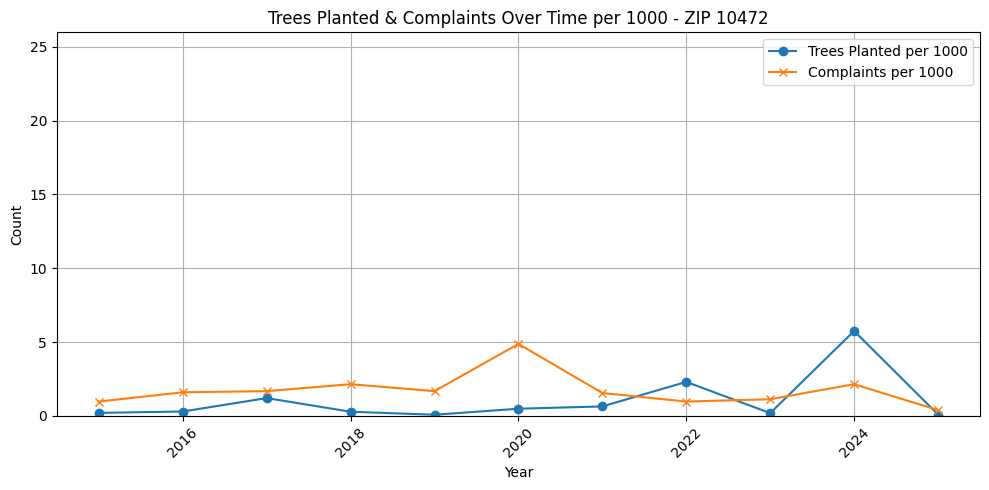

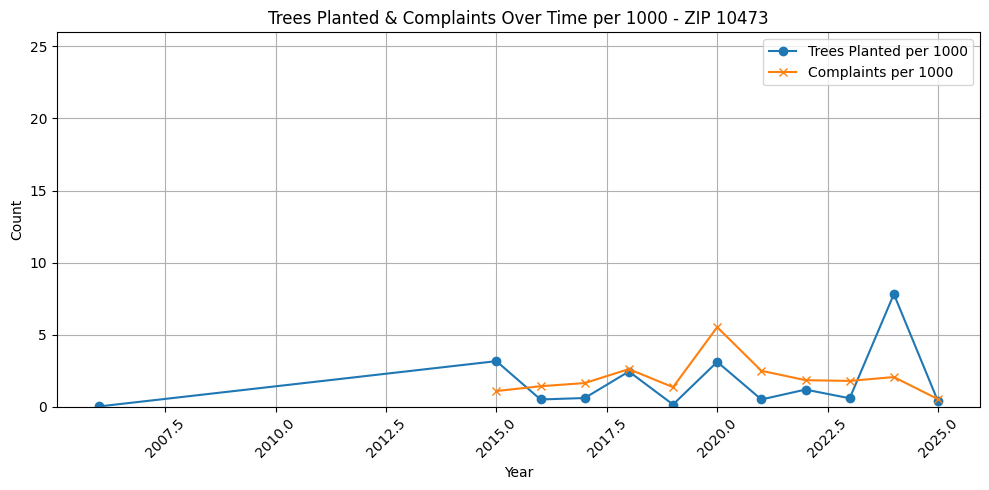

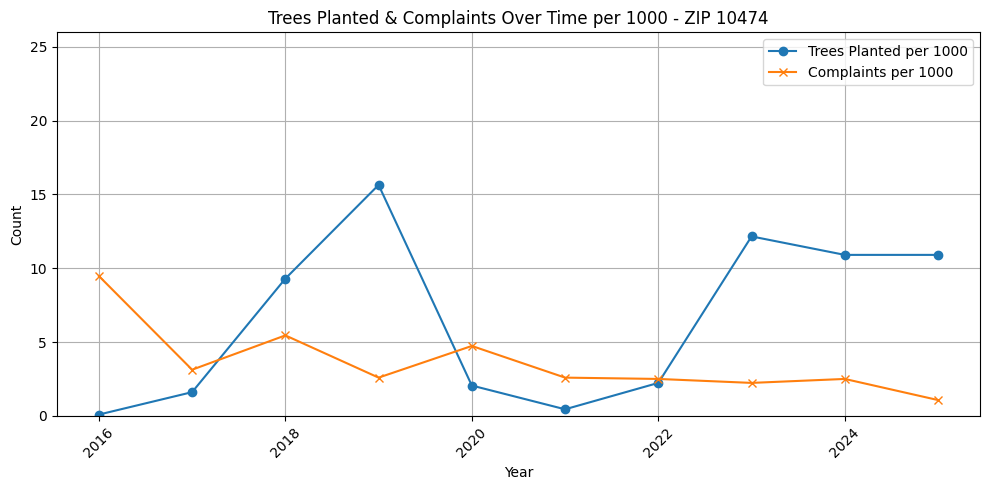

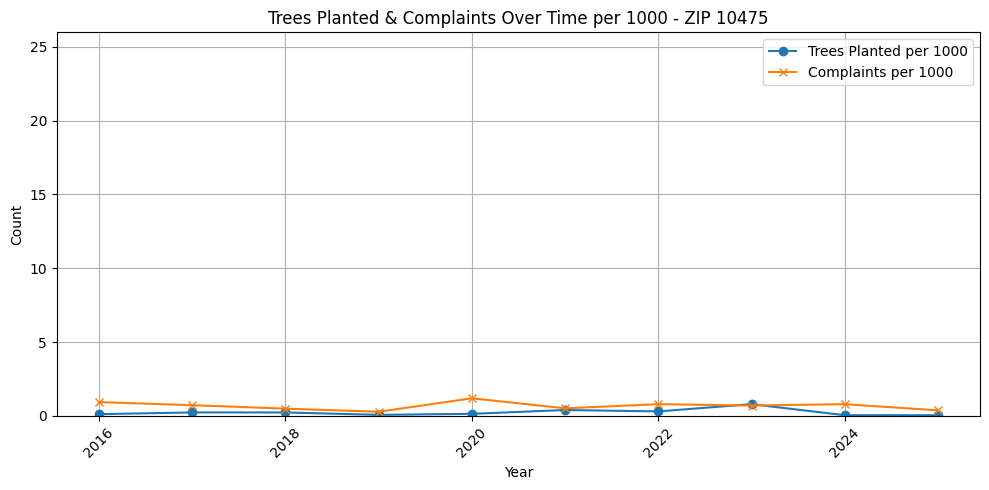

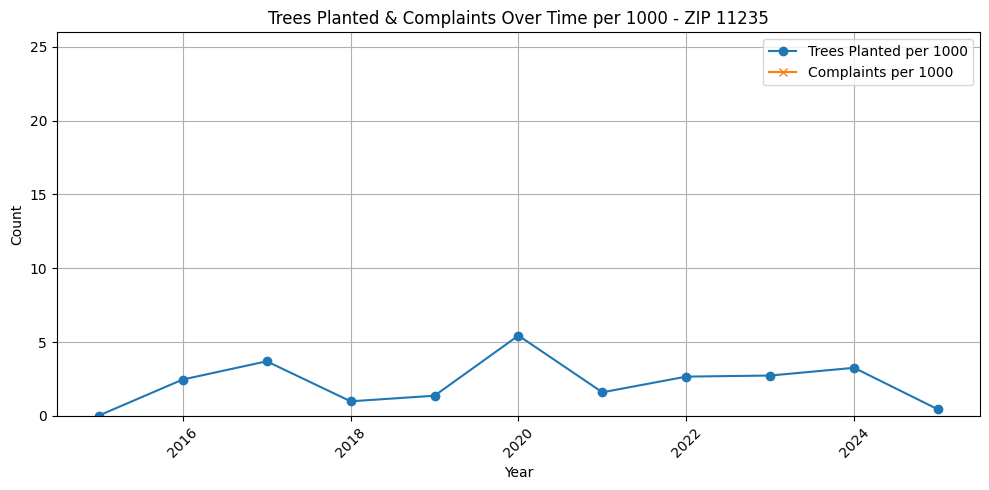

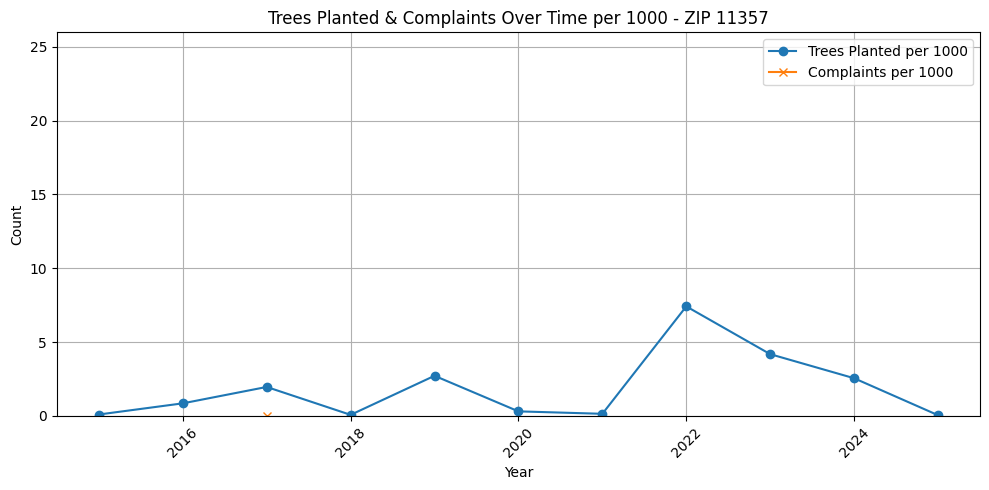

In [271]:
zip_codes = bronx_df['zip_code'].dropna().unique()

for zip_code in zip_codes:
    subset = bronx_df[bronx_df['zip_code'] == zip_code].sort_values('year')
    if subset.empty:
        continue

    plt.figure(figsize=(10, 5))

    plt.plot(subset['year'], subset['trees_per_1000'], marker='o', label='Trees Planted per 1000')
    plt.plot(subset['year'], subset['complaints_per_1000'], marker='x', label='Complaints per 1000')

    plt.title(f'Trees Planted & Complaints Over Time per 1000 - ZIP {zip_code}')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.ylim(ymin, ymax)  # Set the same y axis limits for all
    plt.tight_layout()
    plt.grid(True)
    plt.show()

### Zip codes in the Bronx that saw new trees planted didn't register too much of an uptick in complaints

## EDA in R

In [228]:
%%R

df <- read.csv('trees_and_complaints_yearly.csv')

In [229]:
%%R

colnames(df)

[1] "zip_code"            "year"                "trees_planted"      
[4] "borough"             "complaints"          "name"               
[7] "population"          "trees_per_1000"      "complaints_per_1000"


In [234]:
%%R

dim(df)

[1] 3535    9


In [235]:
%%R

library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 1161 rows containing non-finite outside the scale range (`stat_bin()`). 



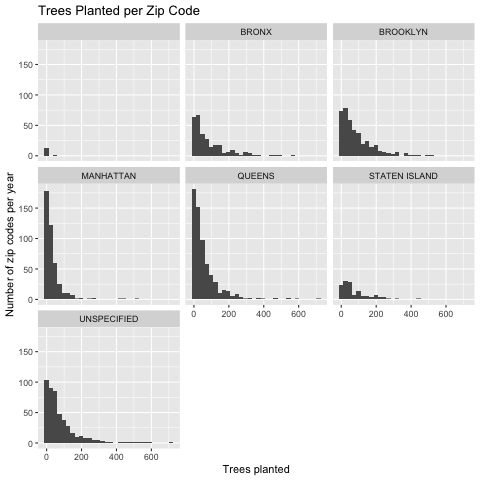

In [236]:
%%R

ggplot(df) +
  aes(x = trees_planted) + 
  geom_histogram() +
  facet_wrap(~borough) +
  labs(title = "Trees Planted per Zip Code",
       x = "Trees planted",
       y = "Number of zip codes per year")

### Some zip codes in the Bronx have had more trees planted in a single year 

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1707 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 1707 rows containing missing values or values outside the scale range
(`geom_point()`). 



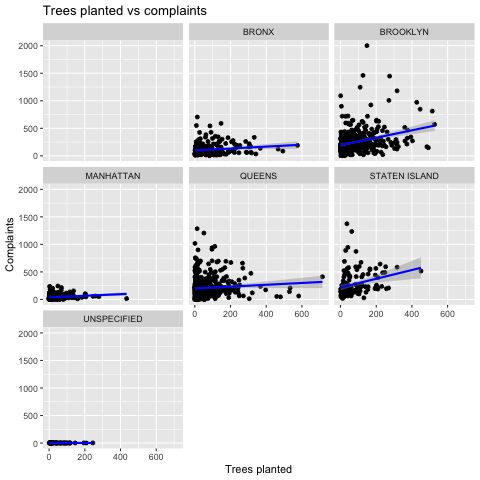

In [237]:
%%R

ggplot(df) +
  aes(x = trees_planted, y = complaints) + 
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
  facet_wrap(~borough) + 
  labs(title = "Trees planted vs complaints",
       x = "Trees planted",
       y = "Complaints")

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1710 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 1707 rows containing missing values or values outside the scale range
(`geom_point()`). 



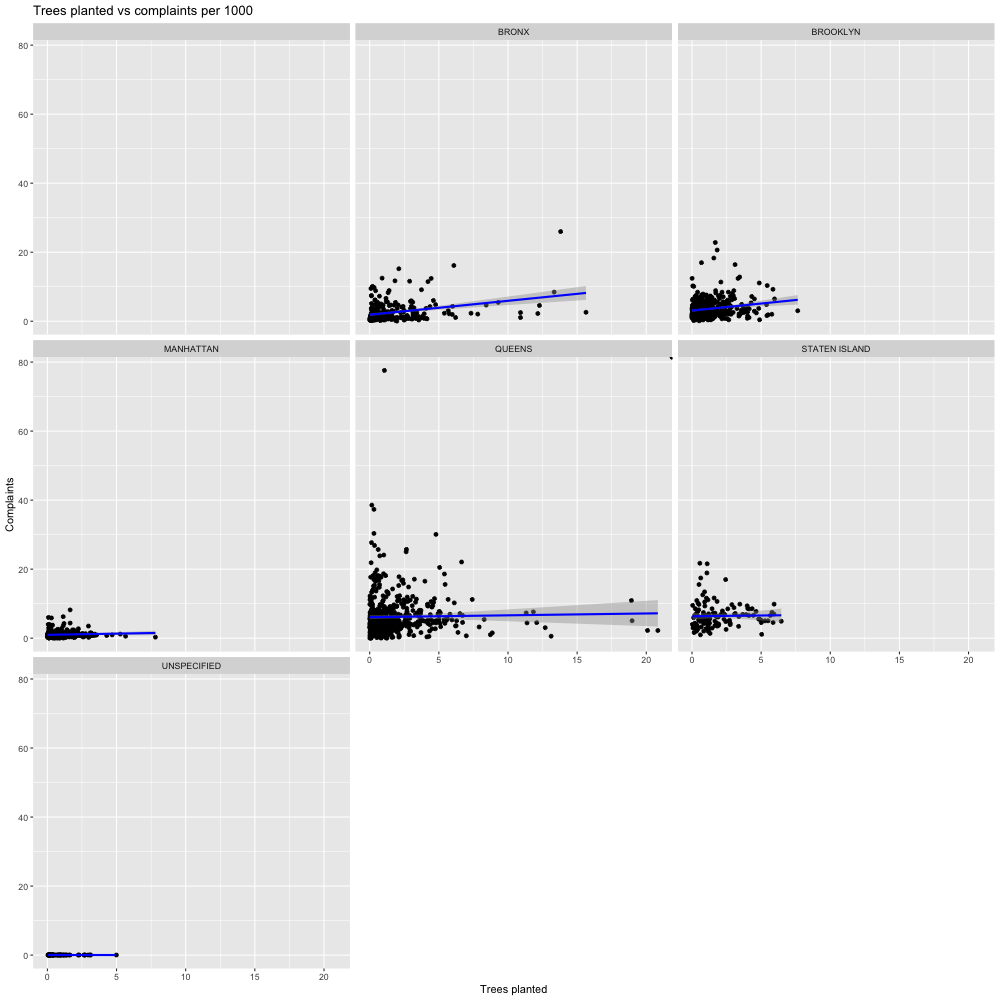

In [273]:
%%R -h 1000 -w 1000

ggplot(df) +
  aes(x = trees_per_1000, y = complaints_per_1000) + 
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
  facet_wrap(~borough) + 
  labs(title = "Trees planted vs complaints per 1000",
       x = "Trees planted",
       y = "Complaints")

In [274]:
%%R

require('tidyverse')
require('DescTools')

Loading required package: DescTools


In [275]:
%%R 
model <- lm(complaints ~ trees_planted, data=df)
summary(model)


Call:
lm(formula = complaints ~ trees_planted, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-389.96 -109.90  -46.89   53.92 1788.19 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   132.59917    5.27886   25.12   <2e-16 ***
trees_planted   0.54874    0.05055   10.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 177.6 on 1826 degrees of freedom
  (1707 observations deleted due to missingness)
Multiple R-squared:  0.06062,	Adjusted R-squared:  0.0601 
F-statistic: 117.8 on 1 and 1826 DF,  p-value: < 2.2e-16



### Number of complaints increases by number of trees planted, but with a small R squared

In [276]:
%%R

bronx_df <- df %>% filter(borough == "BRONX")

In [277]:
%%R 
model <- lm(complaints ~ trees_planted, data=bronx_df)
summary(model)


Call:
lm(formula = complaints ~ trees_planted, data = bronx_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-123.40  -63.32  -37.00   32.63  604.19 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   98.39142    8.21528   11.98   <2e-16 ***
trees_planted  0.17253    0.06848    2.52   0.0123 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 101.7 on 262 degrees of freedom
  (170 observations deleted due to missingness)
Multiple R-squared:  0.02366,	Adjusted R-squared:  0.01993 
F-statistic: 6.348 on 1 and 262 DF,  p-value: 0.01235



### Relationship is less strong in Bronx than in the whole of NYC

In [278]:
%%R

si_df <- df %>% filter(borough == "STATEN ISLAND")

In [279]:
%%R 
model <- lm(complaints ~ trees_planted, data=si_df)
summary(model)


Call:
lm(formula = complaints ~ trees_planted, data = si_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-291.76 -144.15  -73.24   80.91 1129.63 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   216.7990    27.7022   7.826 1.71e-12 ***
trees_planted   0.7936     0.2520   3.149  0.00204 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 226 on 127 degrees of freedom
  (74 observations deleted due to missingness)
Multiple R-squared:  0.07242,	Adjusted R-squared:  0.06512 
F-statistic: 9.916 on 1 and 127 DF,  p-value: 0.002043



In [280]:
%%R

q_df <- df %>% filter(borough == "QUEENS")

In [281]:
%%R 
model <- lm(complaints ~ trees_planted, data=q_df)
summary(model)


Call:
lm(formula = complaints ~ trees_planted, data = q_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-237.13 -103.24  -38.24   44.51 1083.59 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   199.23804    8.72911  22.825   <2e-16 ***
trees_planted   0.16686    0.08712   1.915   0.0559 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 170.1 on 581 degrees of freedom
  (471 observations deleted due to missingness)
Multiple R-squared:  0.006275,	Adjusted R-squared:  0.004564 
F-statistic: 3.669 on 1 and 581 DF,  p-value: 0.05594



In [282]:
%%R

br_df <- df %>% filter(borough == "BROOKLYN")

In [283]:
%%R 
model <- lm(complaints ~ trees_planted, data=br_df)
summary(model)


Call:
lm(formula = complaints ~ trees_planted, data = br_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-378.37 -125.80  -45.12   60.73 1707.94 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   194.5494    14.7017  13.233  < 2e-16 ***
trees_planted   0.6724     0.1100   6.114 2.32e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 213.4 on 398 degrees of freedom
  (218 observations deleted due to missingness)
Multiple R-squared:  0.08585,	Adjusted R-squared:  0.08356 
F-statistic: 37.38 on 1 and 398 DF,  p-value: 2.323e-09



In [284]:
%%R

m_df <- df %>% filter(borough == "MANHATTAN")

In [285]:
%%R 
model <- lm(complaints ~ trees_planted, data=m_df)
summary(model)


Call:
lm(formula = complaints ~ trees_planted, data = m_df)

Residuals:
   Min     1Q Median     3Q    Max 
-84.10 -26.71 -10.00  14.59 198.35 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    38.7203     2.4497  15.806  < 2e-16 ***
trees_planted   0.1414     0.0435   3.251  0.00125 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.28 on 393 degrees of freedom
  (338 observations deleted due to missingness)
Multiple R-squared:  0.02619,	Adjusted R-squared:  0.02372 
F-statistic: 10.57 on 1 and 393 DF,  p-value: 0.001248



### More complaints per trees planted in Staten Island and Brooklyn

In [238]:
from dotenv import load_dotenv
load_dotenv() # <- searches for a file named .env and loads the environment variables in it

True

In [239]:
%%R 

census_api_key(Sys.getenv("CENSUS_API_KEY")) # <- Loads CENSUS_API_KEY from environment variable and sets it in R

To install your API key for use in future sessions, run this function with `install = TRUE`.


In [240]:
%%R

library(tigris)

In [241]:
%%R

# Get ZCTA geometries (defaults to most recent year with data)
zctas <- zctas(year = 2020)  # 2020 is latest full TIGER release for ZCTAs

In [242]:
%%R

nyc_zip_list <- c(
  "10001", "10002", "10003", "10004", "10005", "10006", "10007", "10009", "10010", 
  "10011", "10012", "10013", "10014", "10016", "10017", "10018", "10019", "10020",
  "10021", "10022", "10023", "10024", "10025", "10026", "10027", "10028", "10029", 
  "10030", "10031", "10032", "10033", "10034", "10035", "10036", "10037", "10038", 
  "10039", "10040", "10044", "10065", "10069", "10075", "10128", "10280", "10282",
  "10301", "10302", "10303", "10304", "10305", "10306", "10307", "10308", "10309",
  "10310", "10312", "10314",
  "10451", "10452", "10453", "10454", "10455", "10456", "10457", "10458", "10459",
  "10460", "10461", "10462", "10463", "10464", "10465", "10466", "10467", "10468",
  "10469", "10470", "10471", "10472", "10473", "10474", "10475",
  "11001", "11004", "11005", "11101", "11102", "11103", "11104", "11105", "11106",
  "11354", "11355", "11356", "11357", "11358", "11359", "11360", "11361", "11362",
  "11363", "11364", "11365", "11366", "11367", "11368", "11369", "11370", "11371",
  "11372", "11373", "11374", "11375", "11377", "11378", "11379", "11385",
  "11411", "11412", "11413", "11414", "11415", "11416", "11417", "11418", "11419",
  "11420", "11421", "11422", "11423", "11426", "11427", "11428", "11429", "11430",
  "11432", "11433", "11434", "11435", "11436",
  "11691", "11692", "11693", "11694", "11695", "11697"
)

In [243]:
%%R

ny_zips <- zctas[zctas$GEOID %in% nyc_zip_list, ]

In [244]:
%%R

head(ny_zips)

Simple feature collection with 6 features and 9 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.21316 ymin: 40.51928 xmax: -73.72479 ymax: 40.80101
Geodetic CRS:  NAD83
     ZCTA5CE20 GEOID20 CLASSFP20 MTFCC20 FUNCSTAT20  ALAND20 AWATER20
9052     11363   11363        B5   G6350          S  2239195    34217
9053     11422   11422        B5   G6350          S  5436200   137648
9339     10005   10005        B5   G6350          S   188727        0
9342     10312   10312        B5   G6350          S 17797576   137541
9421     11357   11357        B5   G6350          S  7341415     2281
9422     11413   11413        B5   G6350          S  7812635    43490
      INTPTLAT20   INTPTLON20                       geometry
9052 +40.7723479 -073.7462919 MULTIPOLYGON (((-73.75557 4...
9053 +40.6607865 -073.7375702 MULTIPOLYGON (((-73.75202 4...
9339 +40.7062151 -074.0086868 MULTIPOLYGON (((-74.01251 4...
9342 +40.5452374 -074.1804434 MULTIPOLYGON (((-74.21316 4...
9421 +

In [245]:
%%R

df$zip_code <- as.character(df$zip_code)
ny_zips$ZCTA5CE20 <- as.character(ny_zips$ZCTA5CE20)

In [246]:
%%R

merged_df <- merge(df, ny_zips, by.x = "zip_code", by.y = "ZCTA5CE20", all = TRUE)

In [247]:
%%R

nrow(merged_df)

[1] 3540


In [248]:
%%R

head(merged_df)

  zip_code year trees_planted   borough complaints  name population
1    10001 2025            12 MANHATTAN         17 10001      29079
2    10001 2023            58 MANHATTAN         17 10001      29079
3    10001 2017            21 MANHATTAN         13 10001      29079
4    10001 2024            75 MANHATTAN         21 10001      29079
5    10001 2022            26 MANHATTAN          4 10001      29079
6    10001 2019            14 MANHATTAN         23 10001      29079
  trees_per_1000 complaints_per_1000 GEOID20 CLASSFP20 MTFCC20 FUNCSTAT20
1      0.4126689           0.5846143   10001        B5   G6350          S
2      1.9945665           0.5846143   10001        B5   G6350          S
3      0.7221706           0.4470580   10001        B5   G6350          S
4      2.5791809           0.7221706   10001        B5   G6350          S
5      0.8941160           0.1375563   10001        B5   G6350          S
6      0.4814471           0.7909488   10001        B5   G6350          S
  ALAN

In [249]:
%%R

library(sf)
merged_df <- st_as_sf(merged_df)

In [250]:
%%R

class(merged_df)

[1] "sf"         "data.frame"


In [251]:
%%R

head(merged_df)

Simple feature collection with 6 features and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.00995 ymin: 40.74345 xmax: -73.98408 ymax: 40.75969
Geodetic CRS:  NAD83
  zip_code year trees_planted   borough complaints  name population
1    10001 2025            12 MANHATTAN         17 10001      29079
2    10001 2023            58 MANHATTAN         17 10001      29079
3    10001 2017            21 MANHATTAN         13 10001      29079
4    10001 2024            75 MANHATTAN         21 10001      29079
5    10001 2022            26 MANHATTAN          4 10001      29079
6    10001 2019            14 MANHATTAN         23 10001      29079
  trees_per_1000 complaints_per_1000 GEOID20 CLASSFP20 MTFCC20 FUNCSTAT20
1      0.4126689           0.5846143   10001        B5   G6350          S
2      1.9945665           0.5846143   10001        B5   G6350          S
3      0.7221706           0.4470580   10001        B5   G6350          S
4      2.5791809           0

## Trees planted in 2025

In [203]:
%%R

trees_2025 <- merged_df[merged_df$year == 2025, ]

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In st_point_on_surface.sfc(sf::st_zm(x)) :
R[write to console]: 
 
R[write to console]:  st_point_on_surface may not give correct results for longitude/latitude data

R[write to console]: 2: Removed 4 rows containing missing values or values outside the scale range
(`geom_text()`). 



In addition: Warning message:
st_centroid assumes attributes are constant over geometries 


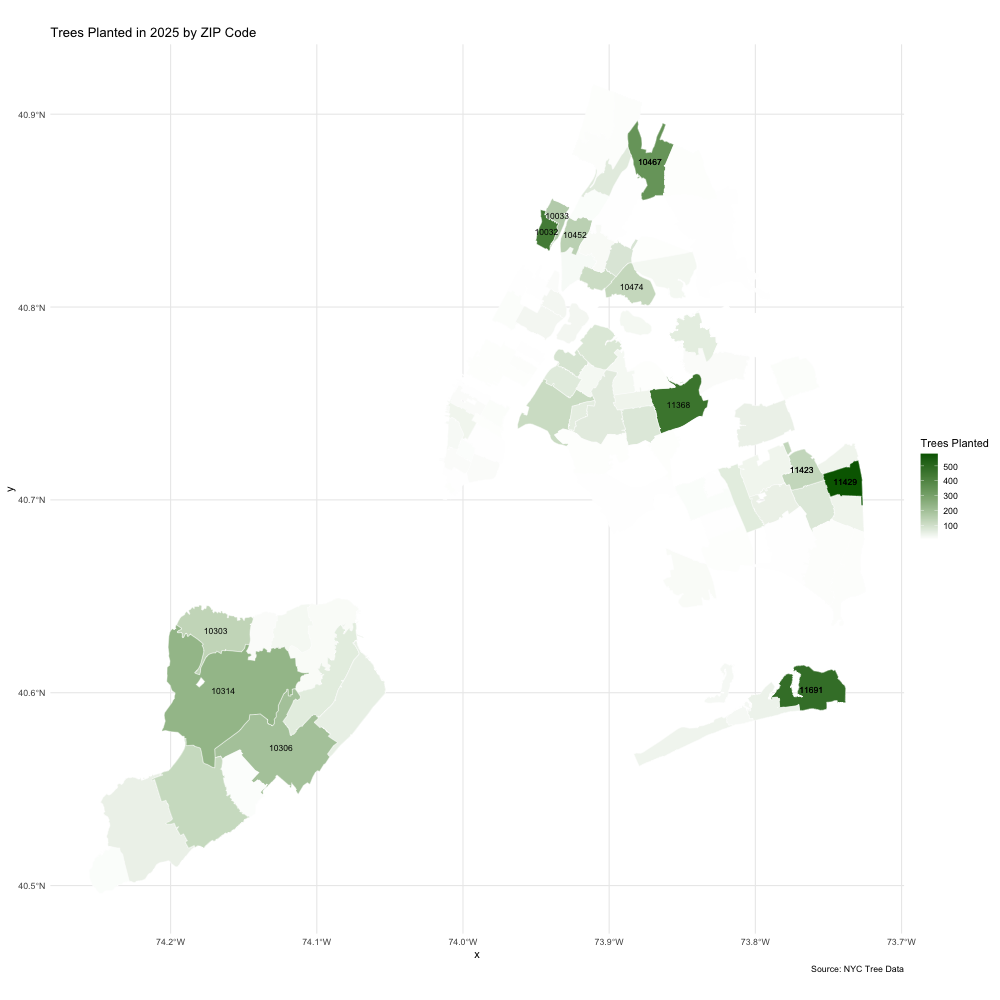

In [204]:
%%R -h 1000 -w 1000

# 1. Top 20 ZIPs by trees planted
top_zips <- trees_2025 %>%
  arrange(desc(trees_planted)) %>%
  slice_head(n = 20)

# 2. Get centroids for label placement
top_zips_centroids <- st_centroid(top_zips)

# 3. Plot with ZIP code labels
ggplot(trees_2025) +
  geom_sf(aes(fill = trees_planted), color = "white", size = 0.2) +
  geom_sf_text(data = top_zips_centroids, aes(label = zip_code), size = 3, color = "black") +
  scale_fill_gradient(
    low = "white", high = "darkgreen", name = "Trees Planted"
  ) +
  labs(
    title = "Trees Planted in 2025 by ZIP Code",
    caption = "Source: NYC Tree Data"
  ) +
  theme_minimal()

## Trees planted in 2024

In [252]:
%%R

trees_2024 <- merged_df[merged_df$year == 2024, ]

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In st_point_on_surface.sfc(sf::st_zm(x)) :
R[write to console]: 
 
R[write to console]:  st_point_on_surface may not give correct results for longitude/latitude data

R[write to console]: 2: Removed 4 rows containing missing values or values outside the scale range
(`geom_text()`). 



In addition: Warning message:
st_centroid assumes attributes are constant over geometries 


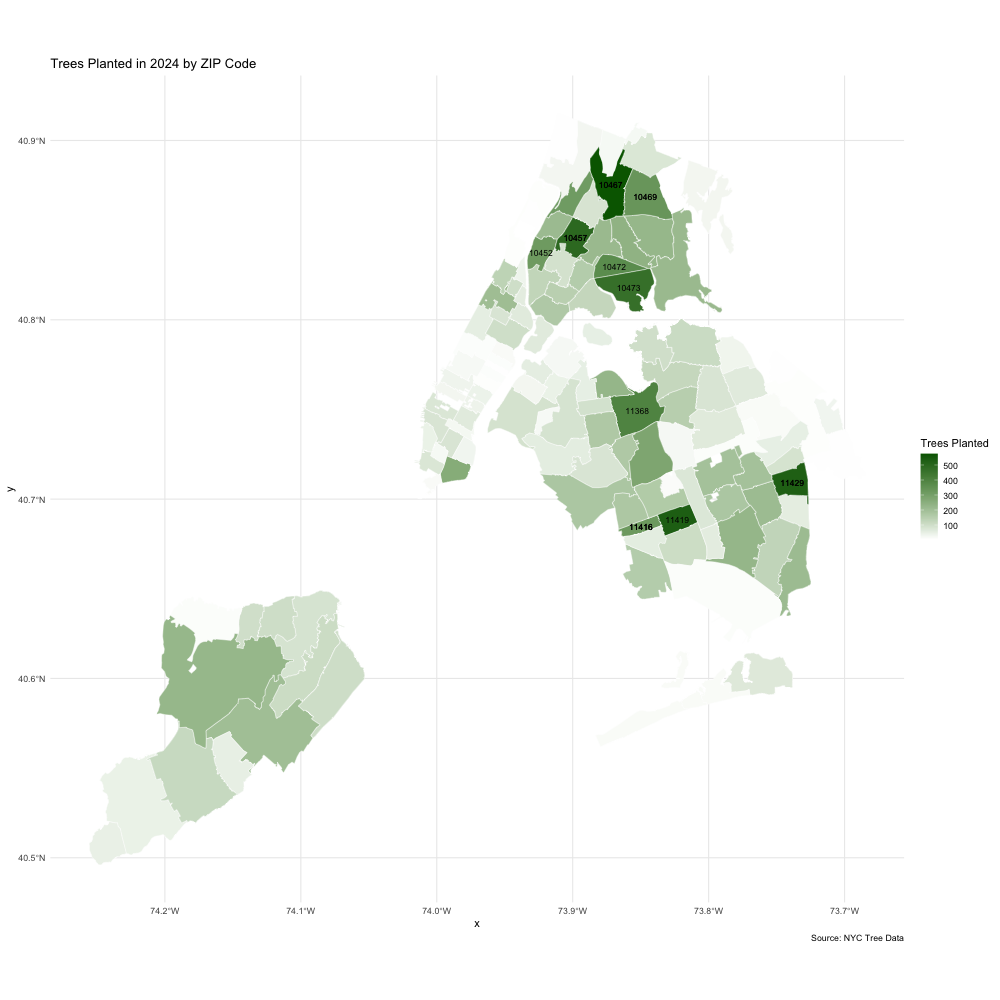

In [232]:
%%R -h 1000 -w 1000

# 1. Top 20 ZIPs by trees planted
top_zips <- trees_2024 %>%
  arrange(desc(trees_planted)) %>%
  slice_head(n = 20)

# 2. Get centroids for label placement
top_zips_centroids <- st_centroid(top_zips)

# 3. Plot with ZIP code labels
ggplot(trees_2024) +
  geom_sf(aes(fill = trees_planted), color = "white", size = 0.2) +
  geom_sf_text(data = top_zips_centroids, aes(label = zip_code), size = 3, color = "black") +
  scale_fill_gradient(
    low = "white", high = "darkgreen", name = "Trees Planted"
  ) +
  labs(
    title = "Trees Planted in 2024 by ZIP Code",
    caption = "Source: NYC Tree Data"
  ) +
  theme_minimal()

## Trees planted in 2023

In [198]:
%%R

trees_2023 <- merged_df[merged_df$year == 2023, ]

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In st_point_on_surface.sfc(sf::st_zm(x)) :
R[write to console]: 
 
R[write to console]:  st_point_on_surface may not give correct results for longitude/latitude data

R[write to console]: 2: Removed 13 rows containing missing values or values outside the scale range
(`geom_text()`). 



In addition: Warning message:
st_centroid assumes attributes are constant over geometries 


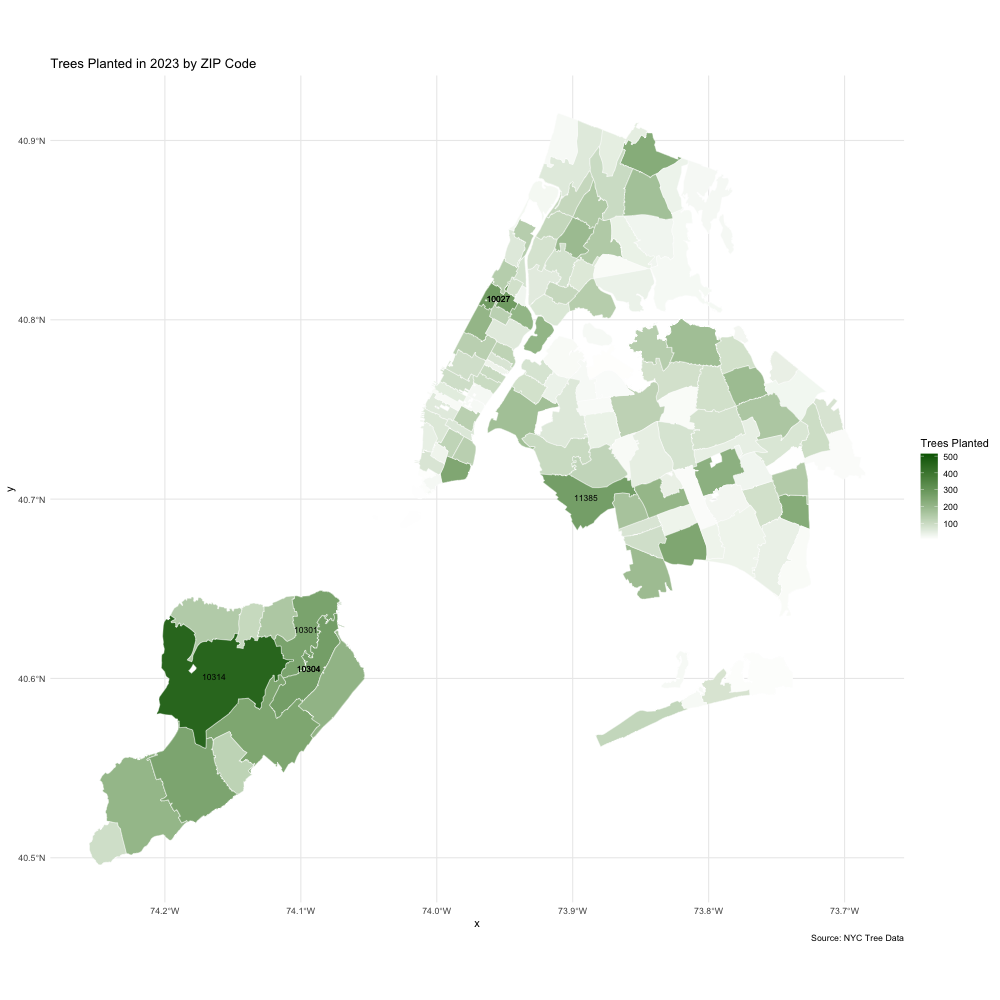

In [199]:
%%R -h 1000 -w 1000

# 1. Top 20 ZIPs by trees planted
top_zips <- trees_2023 %>%
  arrange(desc(trees_planted)) %>%
  slice_head(n = 20)

# 2. Get centroids for label placement
top_zips_centroids <- st_centroid(top_zips)

# 3. Plot with ZIP code labels
ggplot(trees_2023) +
  geom_sf(aes(fill = trees_planted), color = "white", size = 0.2) +
  geom_sf_text(data = top_zips_centroids, aes(label = zip_code), size = 3, color = "black") +
  scale_fill_gradient(
    low = "white", high = "darkgreen", name = "Trees Planted"
  ) +
  labs(
    title = "Trees Planted in 2023 by ZIP Code",
    caption = "Source: NYC Tree Data"
  ) +
  theme_minimal()

## Trees planted in 2022

In [200]:
%%R

trees_2022 <- merged_df[merged_df$year == 2022, ]

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In st_point_on_surface.sfc(sf::st_zm(x)) :
R[write to console]: 
 
R[write to console]:  st_point_on_surface may not give correct results for longitude/latitude data

R[write to console]: 2: Removed 3 rows containing missing values or values outside the scale range
(`geom_text()`). 



In addition: Warning message:
st_centroid assumes attributes are constant over geometries 


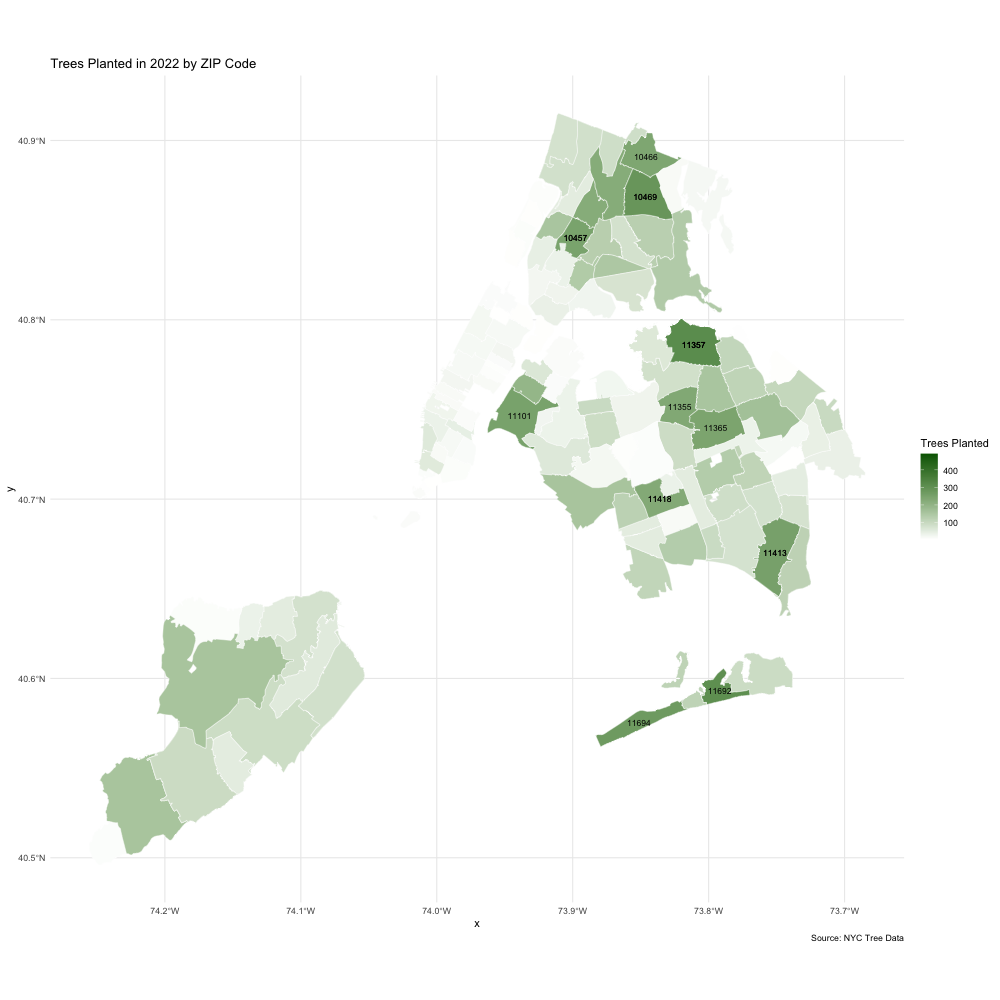

In [202]:
%%R -h 1000 -w 1000

# 1. Top 20 ZIPs by trees planted
top_zips <- trees_2022 %>%
  arrange(desc(trees_planted)) %>%
  slice_head(n = 20)

# 2. Get centroids for label placement
top_zips_centroids <- st_centroid(top_zips)

# 3. Plot with ZIP code labels
ggplot(trees_2022) +
  geom_sf(aes(fill = trees_planted), color = "white", size = 0.2) +
  geom_sf_text(data = top_zips_centroids, aes(label = zip_code), size = 3, color = "black") +
  scale_fill_gradient(
    low = "white", high = "darkgreen", name = "Trees Planted"
  ) +
  labs(
    title = "Trees Planted in 2022 by ZIP Code",
    caption = "Source: NYC Tree Data"
  ) +
  theme_minimal()

## Trees planted in 2021

In [205]:
%%R

trees_2021 <- merged_df[merged_df$year == 2021, ]

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In st_point_on_surface.sfc(sf::st_zm(x)) :
R[write to console]: 
 
R[write to console]:  st_point_on_surface may not give correct results for longitude/latitude data

R[write to console]: 2: Removed 8 rows containing missing values or values outside the scale range
(`geom_text()`). 



In addition: Warning message:
st_centroid assumes attributes are constant over geometries 


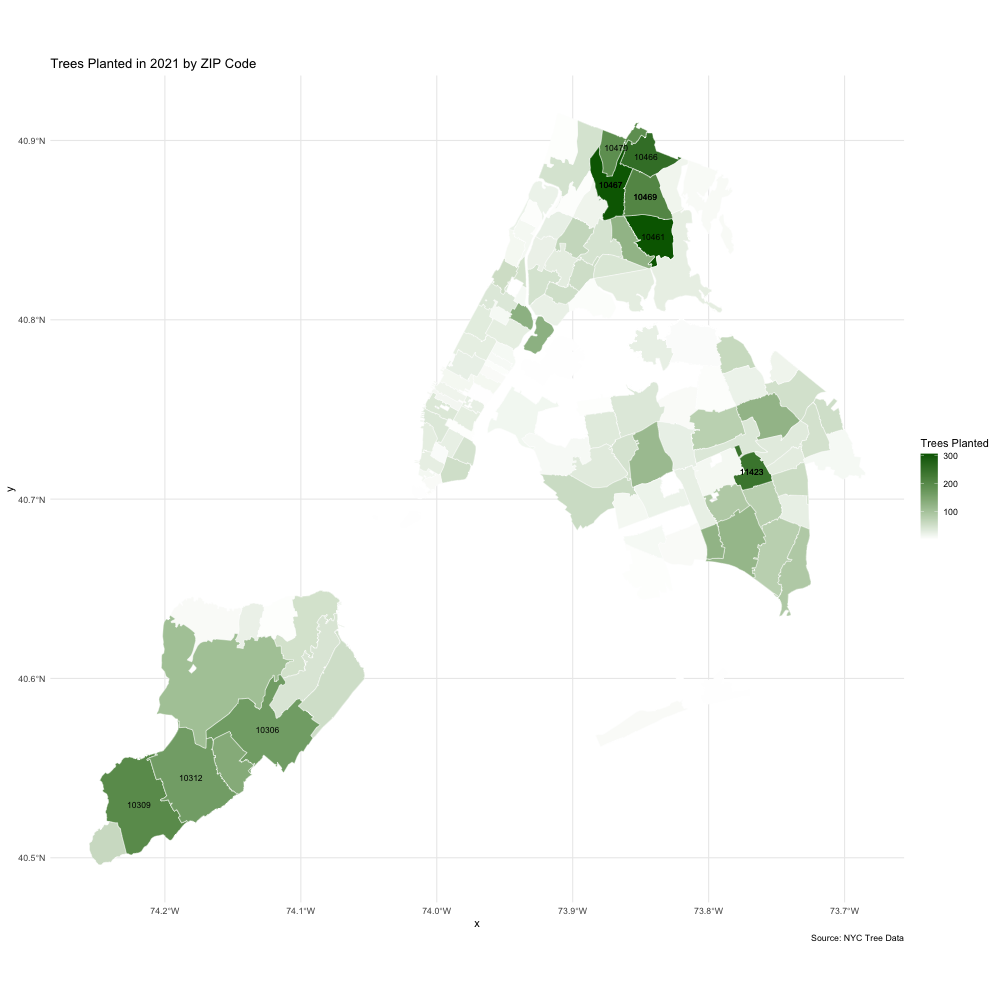

In [206]:
%%R -h 1000 -w 1000

# 1. Top 20 ZIPs by trees planted
top_zips <- trees_2021 %>%
  arrange(desc(trees_planted)) %>%
  slice_head(n = 20)

# 2. Get centroids for label placement
top_zips_centroids <- st_centroid(top_zips)

# 3. Plot with ZIP code labels
ggplot(trees_2021) +
  geom_sf(aes(fill = trees_planted), color = "white", size = 0.2) +
  geom_sf_text(data = top_zips_centroids, aes(label = zip_code), size = 3, color = "black") +
  scale_fill_gradient(
    low = "white", high = "darkgreen", name = "Trees Planted"
  ) +
  labs(
    title = "Trees Planted in 2021 by ZIP Code",
    caption = "Source: NYC Tree Data"
  ) +
  theme_minimal()

## Trees planted in 2020

In [207]:
%%R

trees_2020 <- merged_df[merged_df$year == 2020, ]

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In st_point_on_surface.sfc(sf::st_zm(x)) :
R[write to console]: 
 
R[write to console]:  st_point_on_surface may not give correct results for longitude/latitude data

R[write to console]: 2: Removed 13 rows containing missing values or values outside the scale range
(`geom_text()`). 



In addition: Warning message:
st_centroid assumes attributes are constant over geometries 


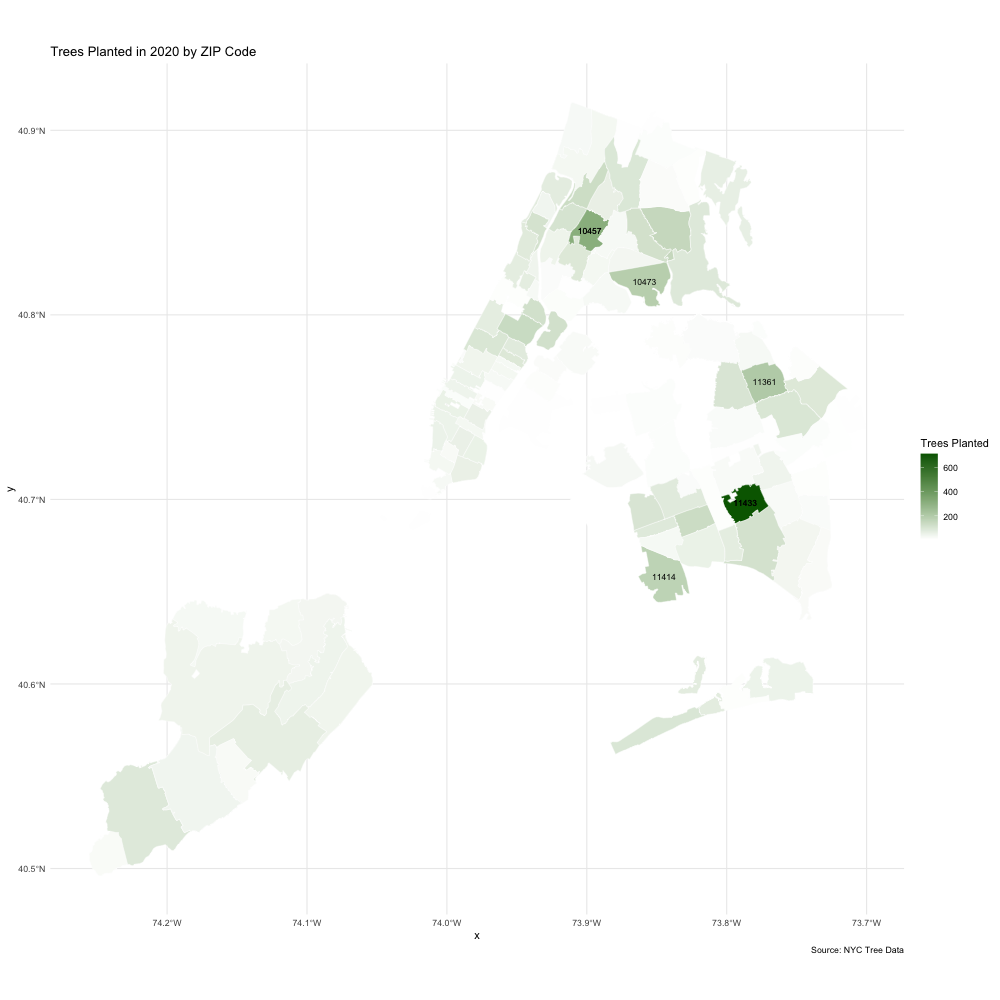

In [208]:
%%R -h 1000 -w 1000

# 1. Top 20 ZIPs by trees planted
top_zips <- trees_2020 %>%
  arrange(desc(trees_planted)) %>%
  slice_head(n = 20)

# 2. Get centroids for label placement
top_zips_centroids <- st_centroid(top_zips)

# 3. Plot with ZIP code labels
ggplot(trees_2020) +
  geom_sf(aes(fill = trees_planted), color = "white", size = 0.2) +
  geom_sf_text(data = top_zips_centroids, aes(label = zip_code), size = 3, color = "black") +
  scale_fill_gradient(
    low = "white", high = "darkgreen", name = "Trees Planted"
  ) +
  labs(
    title = "Trees Planted in 2020 by ZIP Code",
    caption = "Source: NYC Tree Data"
  ) +
  theme_minimal()

## Trees planted from 2022-2025

In [255]:
%%R

trees_22_25 <- merged_df[merged_df$year %in% c(2020, 2021, 2022, 2023, 2024, 2025), ]

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In st_point_on_surface.sfc(sf::st_zm(x)) :
R[write to console]: 
 
R[write to console]:  st_point_on_surface may not give correct results for longitude/latitude data

R[write to console]: 2: Removed 6 rows containing missing values or values outside the scale range
(`geom_text()`). 



In addition: Warning message:
st_centroid assumes attributes are constant over geometries 


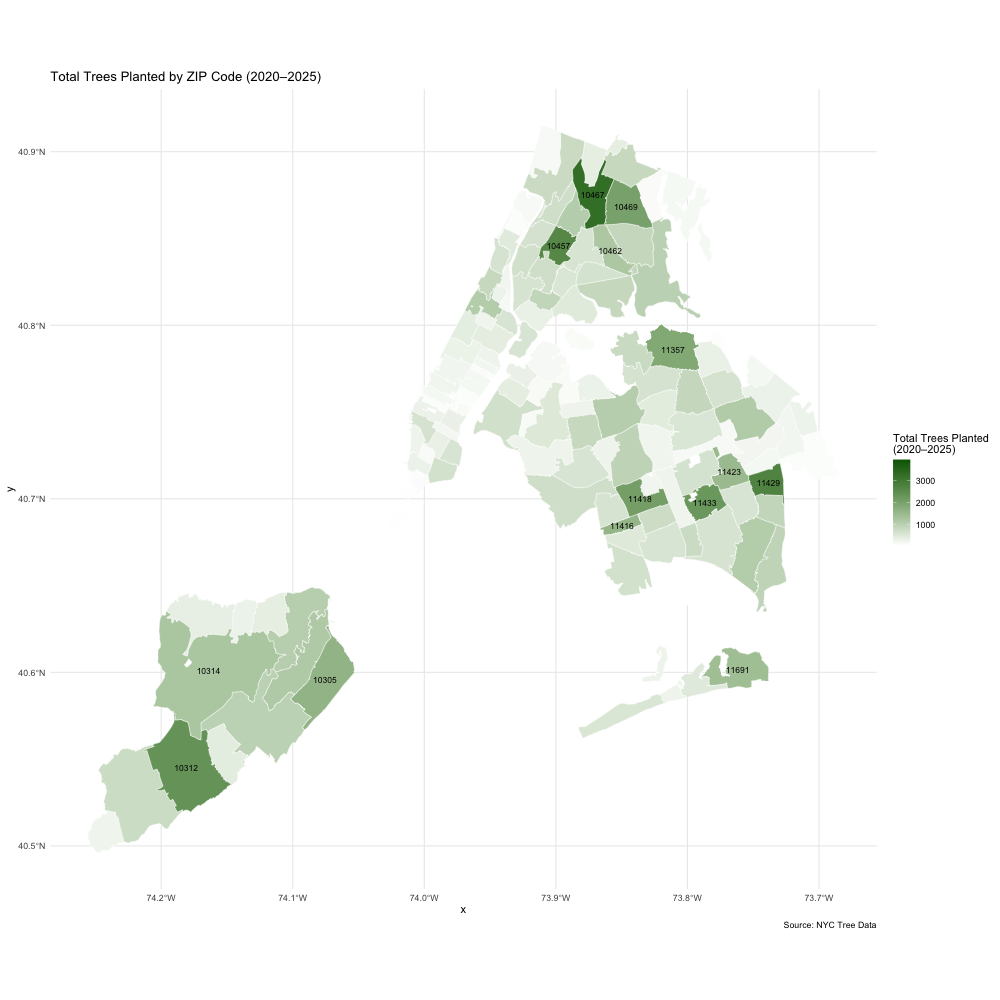

In [212]:
%%R -h 1000 -w 1000

# 1. Filter to years 2020–2025
trees_recent <- merged_df %>%
  filter(year %in% 2020:2025)

# 2. Aggregate total trees planted per ZIP
trees_total <- trees_recent %>%
  group_by(zip_code) %>%
  summarize(
    trees_planted = sum(trees_planted, na.rm = TRUE),
    geometry = st_union(geometry),  # maintain sf structure
    .groups = "drop"
  ) %>%
  st_as_sf()

# 3. Get top 20 ZIP codes
top_zips <- trees_total %>%
  arrange(desc(trees_planted)) %>%
  slice_head(n = 20)

# 4. Compute centroids for label placement
top_zips_centroids <- st_centroid(top_zips)

# 5. Plot
ggplot(trees_total) +
  geom_sf(aes(fill = trees_planted), color = "white", size = 0.2) +
  geom_sf_text(
    data = top_zips_centroids,
    aes(label = zip_code),
    size = 3,
    color = "black"
  ) +
  scale_fill_gradient(
    low = "white", high = "darkgreen", name = "Total Trees Planted\n(2020–2025)"
  ) +
  labs(
    title = "Total Trees Planted by ZIP Code (2020–2025)",
    caption = "Source: NYC Tree Data"
  ) +
  theme_minimal()

## Trees planted in 2024 per 1000

In [253]:
%%R

head(trees_2024)

Simple feature collection with 6 features and 17 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.04721 ymin: 40.68392 xmax: -73.97487 ymax: 40.75969
Geodetic CRS:  NAD83
   zip_code year trees_planted   borough complaints  name population
4     10001 2024            75 MANHATTAN         21 10001      29079
16    10002 2024           260 MANHATTAN         61 10002      75517
31    10003 2024            79 MANHATTAN         82 10003      53825
38    10004 2024             2 MANHATTAN          2 10004       3875
45    10005 2024             2 MANHATTAN         NA 10005       9238
53    10007 2024             2 MANHATTAN          5 10007       7802
   trees_per_1000 complaints_per_1000 GEOID20 CLASSFP20 MTFCC20 FUNCSTAT20
4       2.5791809           0.7221706   10001        B5   G6350          S
16      3.4429334           0.8077651   10002        B5   G6350          S
31      1.4677195           1.5234556   10003        B5   G6350          S
38      0.5161290

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In st_point_on_surface.sfc(sf::st_zm(x)) :
R[write to console]: 
 
R[write to console]:  st_point_on_surface may not give correct results for longitude/latitude data

R[write to console]: 2: Removed 3 rows containing missing values or values outside the scale range
(`geom_text()`). 



In addition: Warning message:
st_centroid assumes attributes are constant over geometries 


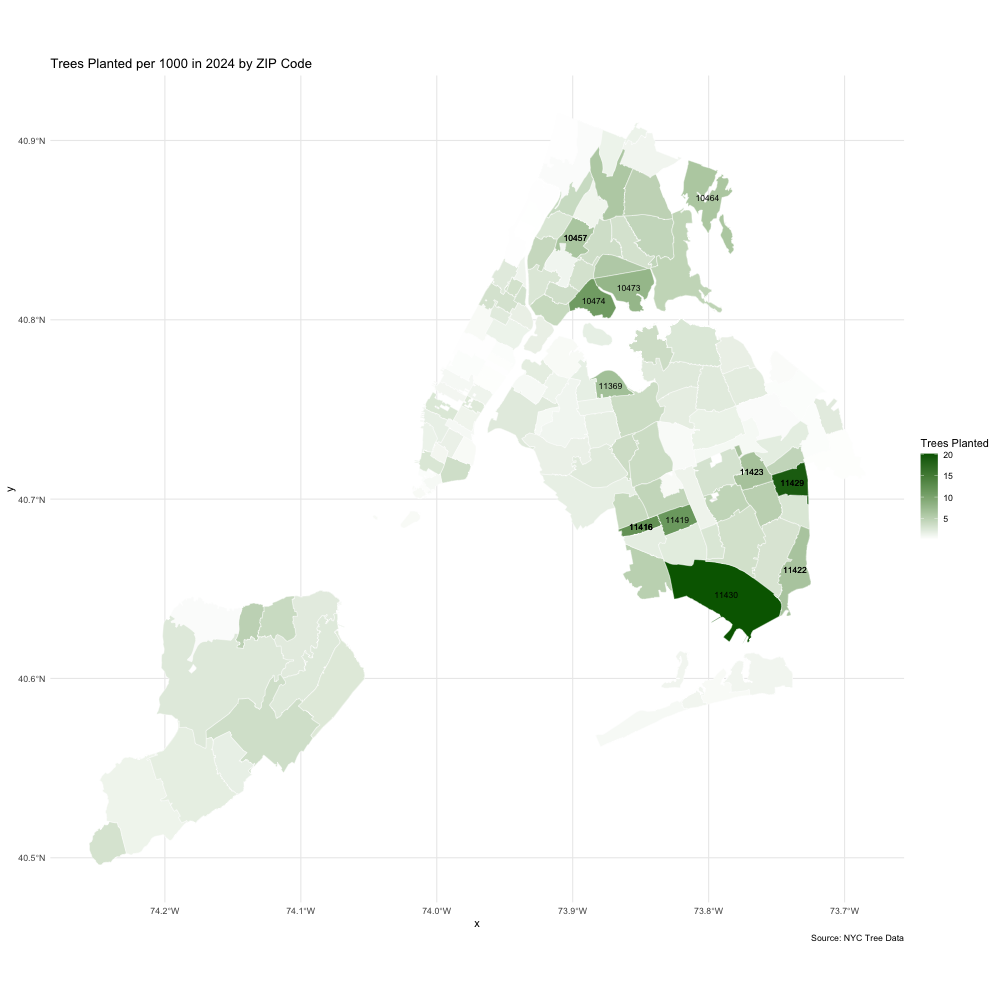

In [254]:
%%R -h 1000 -w 1000

# 1. Top 20 ZIPs by trees planted
top_zips <- trees_2024 %>%
  arrange(desc(trees_per_1000)) %>%
  slice_head(n = 20)

# 2. Get centroids for label placement
top_zips_centroids <- st_centroid(top_zips)

# 3. Plot with ZIP code labels
ggplot(trees_2024) +
  geom_sf(aes(fill = trees_per_1000), color = "white", size = 0.2) +
  geom_sf_text(data = top_zips_centroids, aes(label = zip_code), size = 3, color = "black") +
  scale_fill_gradient(
    low = "white", high = "darkgreen", name = "Trees Planted"
  ) +
  labs(
    title = "Trees Planted per 1000 in 2024 by ZIP Code",
    caption = "Source: NYC Tree Data"
  ) +
  theme_minimal()

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In st_point_on_surface.sfc(sf::st_zm(x)) :
R[write to console]: 
 
R[write to console]:  st_point_on_surface may not give correct results for longitude/latitude data

R[write to console]: 2: Removed 6 rows containing missing values or values outside the scale range
(`geom_text()`). 



In addition: Warning message:
st_centroid assumes attributes are constant over geometries 


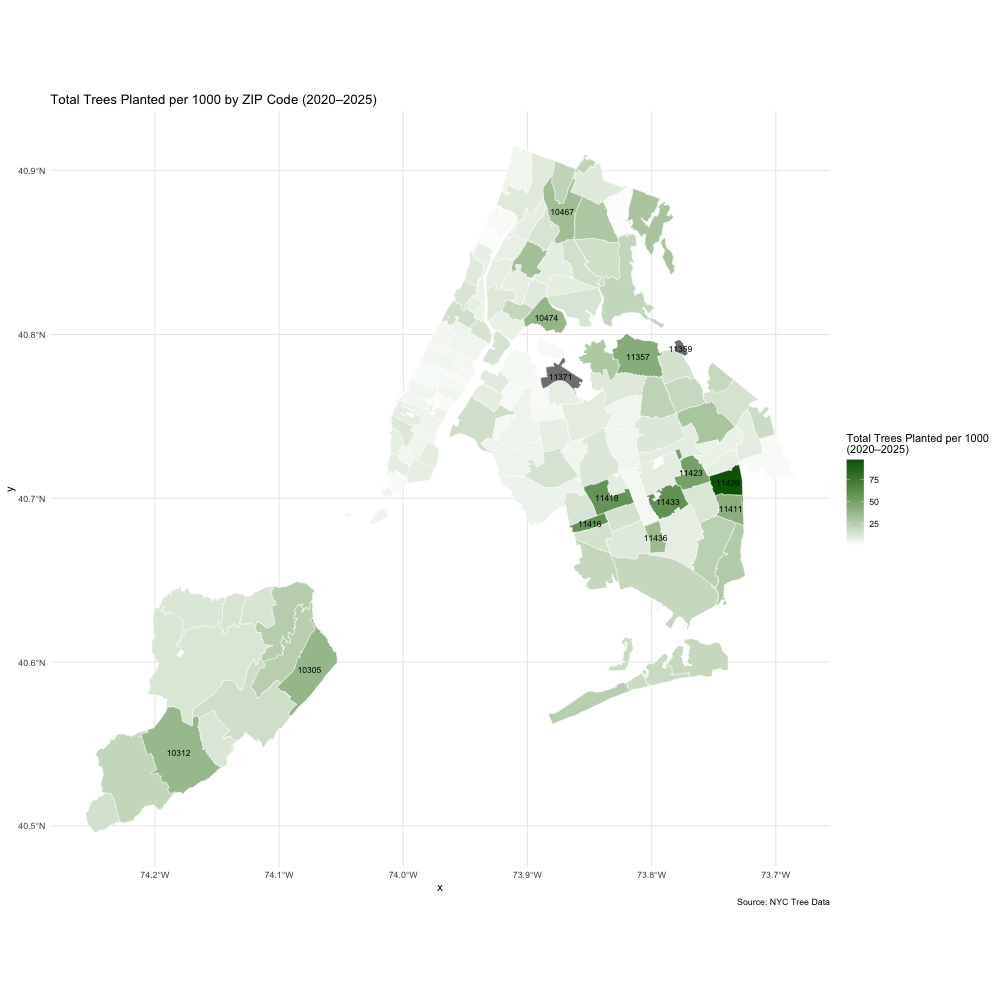

In [256]:
%%R -h 1000 -w 1000

# 1. Filter to years 2020–2025
trees_recent <- merged_df %>%
  filter(year %in% 2020:2025)

# 2. Aggregate total trees planted per ZIP
trees_total <- trees_recent %>%
  group_by(zip_code) %>%
  summarize(
    trees_per_1000 = sum(trees_per_1000, na.rm = TRUE),
    geometry = st_union(geometry),  # maintain sf structure
    .groups = "drop"
  ) %>%
  st_as_sf()

# 3. Get top 20 ZIP codes
top_zips <- trees_total %>%
  arrange(desc(trees_per_1000)) %>%
  slice_head(n = 20)

# 4. Compute centroids for label placement
top_zips_centroids <- st_centroid(top_zips)

# 5. Plot
ggplot(trees_total) +
  geom_sf(aes(fill = trees_per_1000), color = "white", size = 0.2) +
  geom_sf_text(
    data = top_zips_centroids,
    aes(label = zip_code),
    size = 3,
    color = "black"
  ) +
  scale_fill_gradient(
    low = "white", high = "darkgreen", name = "Total Trees Planted per 1000\n(2020–2025)"
  ) +
  labs(
    title = "Total Trees Planted per 1000 by ZIP Code (2020–2025)",
    caption = "Source: NYC Tree Data"
  ) +
  theme_minimal()

## Tree damage complaints from 2022-2025

In [257]:
%%R

complaints_22_25 <- merged_df[merged_df$year %in% c(2020, 2021, 2022, 2023, 2024, 2025), ]

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In st_point_on_surface.sfc(sf::st_zm(x)) :
R[write to console]: 
 
R[write to console]:  st_point_on_surface may not give correct results for longitude/latitude data

R[write to console]: 2: Removed 1 row containing missing values or values outside the scale range
(`geom_text()`). 



In addition: Warning message:
st_centroid assumes attributes are constant over geometries 


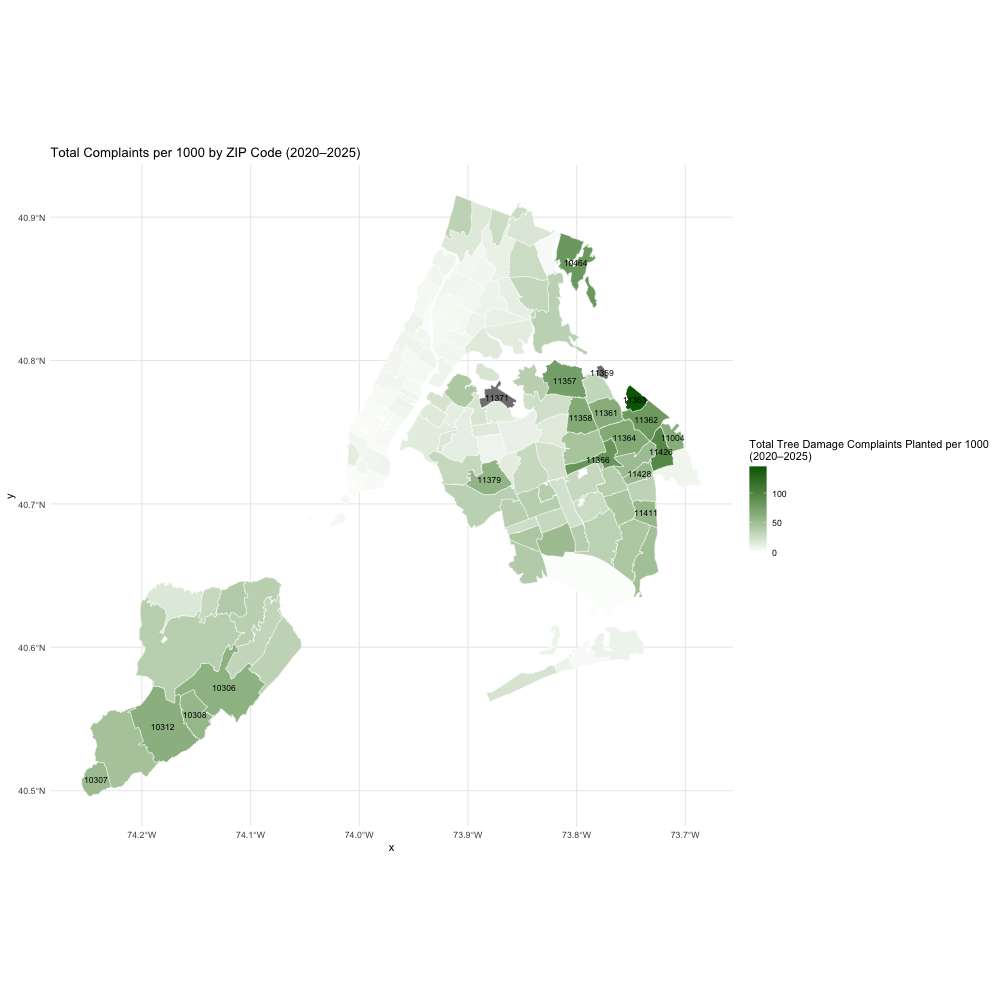

In [259]:
%%R -h 1000 -w 1000

# 2. Aggregate total complaints per ZIP
complaints_total <- complaints_22_25 %>%
  group_by(zip_code) %>%
  summarize(
    complaints_per_1000 = sum(complaints_per_1000, na.rm = TRUE),
    geometry = st_union(geometry),  # maintain sf structure
    .groups = "drop"
  ) %>%
  st_as_sf()

# 3. Get top 20 ZIP codes
top_zips <- complaints_total %>%
  arrange(desc(complaints_per_1000)) %>%
  slice_head(n = 20)

# 4. Compute centroids for label placement
top_zips_centroids <- st_centroid(top_zips)

# 5. Plot
ggplot(complaints_total) +
  geom_sf(aes(fill = complaints_per_1000), color = "white", size = 0.2) +
  geom_sf_text(
    data = top_zips_centroids,
    aes(label = zip_code),
    size = 3,
    color = "black"
  ) +
  scale_fill_gradient(
    low = "white", high = "darkgreen", name = "Total Tree Damage Complaints Planted per 1000\n(2020–2025)"
  ) +
  labs(
    title = "Total Complaints per 1000 by ZIP Code (2020–2025)"
  ) +
  theme_minimal()

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In st_point_on_surface.sfc(sf::st_zm(x)) :
R[write to console]: 
 
R[write to console]:  st_point_on_surface may not give correct results for longitude/latitude data

R[write to console]: 2: Removed 10 rows containing missing values or values outside the scale range
(`geom_text()`). 



In addition: Warning message:
st_centroid assumes attributes are constant over geometries 


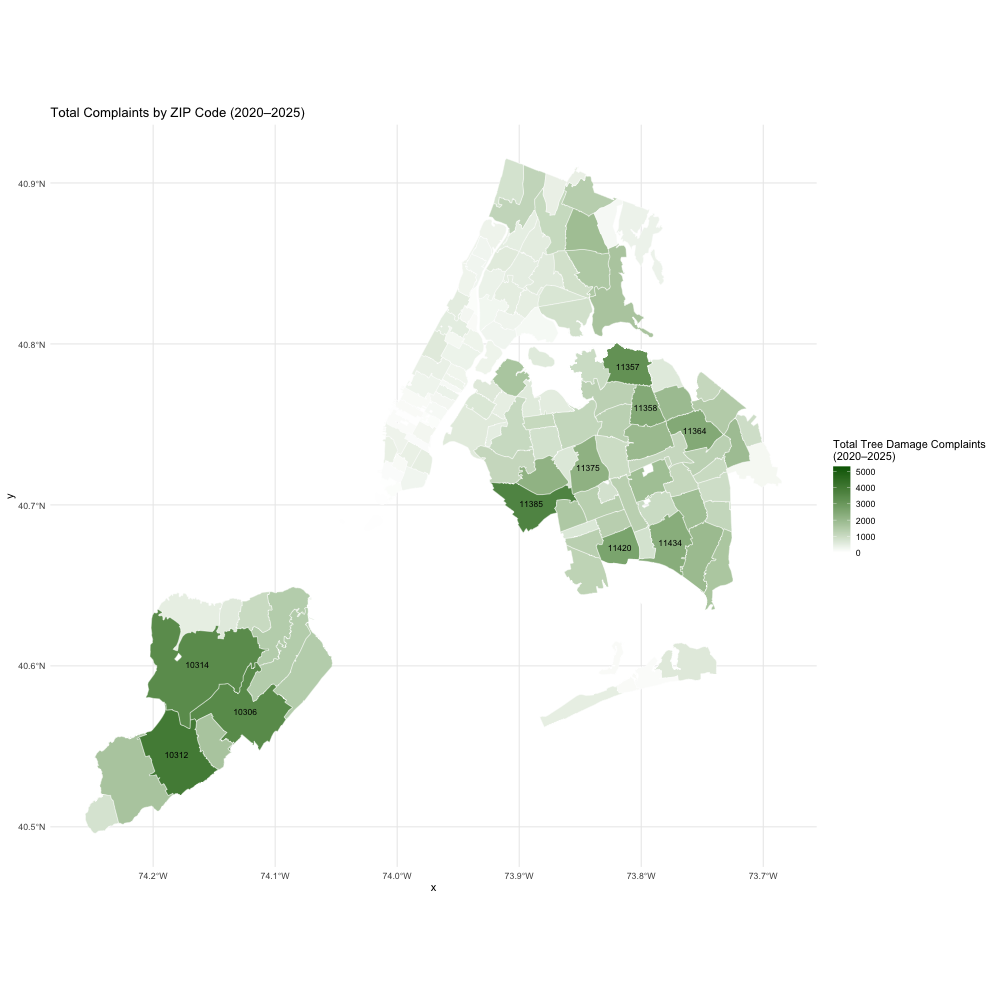

In [261]:
%%R -h 1000 -w 1000

# 2. Aggregate total complaints per ZIP
complaints_total <- complaints_22_25 %>%
  group_by(zip_code) %>%
  summarize(
    complaints = sum(complaints, na.rm = TRUE),
    geometry = st_union(geometry),  # maintain sf structure
    .groups = "drop"
  ) %>%
  st_as_sf()

# 3. Get top 20 ZIP codes
top_zips <- complaints_total %>%
  arrange(desc(complaints)) %>%
  slice_head(n = 20)

# 4. Compute centroids for label placement
top_zips_centroids <- st_centroid(top_zips)

# 5. Plot
ggplot(complaints_total) +
  geom_sf(aes(fill = complaints), color = "white", size = 0.2) +
  geom_sf_text(
    data = top_zips_centroids,
    aes(label = zip_code),
    size = 3,
    color = "black"
  ) +
  scale_fill_gradient(
    low = "white", high = "darkgreen", name = "Total Tree Damage Complaints \n(2020–2025)"
  ) +
  labs(
    title = "Total Complaints by ZIP Code (2020–2025)"
  ) +
  theme_minimal()